In [1]:
%load_ext autoreload
%autoreload 2

Try with **multiple dimension**! 5 or 6

In [2]:
from scipy.stats import norm
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np 
np.random.seed(42)
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
from pathlib import Path
outfig_dir = "0_output_figures"
Path(outfig_dir).mkdir(parents=True, exist_ok=True)

# Functions

In [4]:
def get_ranges_from_itemset(itemset):
    itemset_split = {}
    for item in itemset:
        
        if item=="":
            print(item)
            continue
        start_v, end_v = None, None
        s = item.split("=")
        attr, v = s[0], "=".join(s[1:])
        if v[0:2] == ">=":
            start_v = v[2:]
        elif v[0:2] == "<=":
            end_v = v[2:]
        else:
            v = v[1:-1]
            vals = v.split("-")
            if len(vals)==2:
                start_v, end_v = vals[0], vals[1]
            else:
                start_v, end_v = vals[0], vals[-1]
                if vals[0] == "":
                    start_v = "-" + vals[1]
                if vals[-2] == "":
                    end_v = "-" + vals[-1]
        itemset_split[attr] = float(start_v) if start_v!=None else start_v, float(end_v)  if end_v!=None else end_v
    return itemset_split

In [235]:
def show_splits_axes(attr, ax, ranges, min_max_vals, h = 2, eps=0, show_all_if_non = False):
    if attr not in ranges:
        if show_all_if_non:
            start_v, end_v = min_max_vals[attr][0], min_max_vals[attr][1]
            ax.axvspan(start_v, end_v, alpha=0.1)
            return ax
        else:
            print(f"Attribute {attr} not in the itemset")
            return ax
    start_v, end_v = ranges[attr]
    if start_v is None:
        start_v = min_max_vals[attr][0]
    if end_v is None:
        end_v = min_max_vals[attr][1]
    
    ax.axvspan(start_v, end_v, alpha=0.1)
    ax.hlines(y=h, xmin=start_v, xmax=end_v, linestyle = '--')
    ax.scatter([start_v + eps ], [h], marker = '<', c = "black" )
    ax.scatter([end_v - eps], [h], marker = '>' , c = "black" )
    return ax
        

In [6]:
def add_splits_axes(attr, ax, tree_discr, min_max_vals, g, cmap_type='tab10', show_span = True, show_lines = True, p = 0.2, eps = 0.1):

    splits = tree_discr.trees[attr].get_discretization_relations(apply_generalization=True, generalization_dict = generalization_dict)

    cmap=plt.get_cmap(cmap_type)
    levels = []
    for rel, value, level, rel_int, values_int in list(tree_discr.trees[attr].printTreeHierarchy()[['rel', 'value', 'level', 'rels_ret', 'vals_ret']].values):
        rel, value = list(rel)[0], list(value)[0]
        rel_int, values_int =  rel_int[attr], values_int[attr]

        ax.axvline(x=value, color = cmap(level), label = level, linestyle='-')
        levels.append(level)
        # Min and max values
        start_v, end_v= min_max_vals[attr][0], min_max_vals[attr][1]
       
        y = max(g)-max(g)*level*p
        if len(values_int) ==1:
            if rel_int[0] == '<=':
                end_v = values_int[0]
            else:
                start_v = values_int[0]
        else:
            start_v = values_int[0]
            end_v = values_int[1]

        if show_span:
            ax.axvspan(start_v, end_v, alpha=0.1, color = cmap(level))
        if show_lines:
            ax.hlines(y=y, xmin=start_v, xmax=end_v, color = cmap(level), linestyle = '--')
            ax.scatter([start_v + eps ], [y], marker = '<' , color = cmap(level))
            ax.scatter([end_v - eps], [y], marker = '>' , color = cmap(level))
    return ax, cmap, levels
        

In [7]:
def plot_normal_attr(x, ax, g_sc, g_attr_i, plot_points = False):
    if plot_points:
        ax.scatter(x, g_sc, s= 1, c="gray"); 
    ids = np.argsort(x)
    ax.plot(x[ids], g_attr_i[ids])
    return ax

In [8]:
def plot_attributes_split(df_vals, attributes, itemset, target_vals, g_attrs, min_max_vals, verbose = False, show_all_if_non = False, plot_points = False):
    
    ranges = get_ranges_from_itemset(itemset)
    if verbose:
        print("Ranges", ranges)
    eps = 0
    h = max(target_vals)+eps
    
    max_viz = 5
    if len(attributes)> max_viz:
        # Show at most max_viz attributes
        attributes = attributes[:max_viz]
    
    fig, axs = plt.subplots(1,len(attributes), figsize = (19,4))
    for e, attribute in enumerate(attributes):
        axs[e] = plot_normal_attr(df_vals[attribute].values, axs[e], target_vals, g_attrs[e], plot_points = plot_points)
        show_splits_axes(attribute, axs[e], ranges, min_max_vals, h, eps = eps, show_all_if_non = show_all_if_non)
        axs[e].set_title(attribute);
    return fig

# Error rate based on a gaussian

In [9]:
stats_tree = {}

In [10]:
# Gaussian circolare
# Prodotto di 2 gaussiane
# Gaussian in 2 or n dimension
# Target function: try also weighted

# Points uniformely distributed in n dimensions (many!)
# Pick a point 
# Compute gaussian in that point exp -distance(p, centro)^2/sigma^2 (* coef of flipping, so that) ...
# Flip class with probability equal to the probabiliity indicated by the gaussian

(10000,)


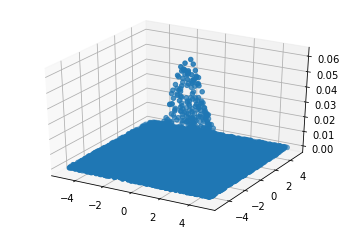

In [11]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
n = 10000
n_attributes = 3

#x = np.random.default_rng().uniform(-5,5,n)
#y = np.random.default_rng().uniform(-5,5,n)
#X = np.vstack([x,y]).T

X = np.random.uniform(low=-5, high=5, size=(n, n_attributes))

# g = norm(loc = 0., scale = 2.0).pdf(X)
mean = np.arange(n_attributes)
cov = np.ones(n_attributes)
#f_g = multivariate_normal(np.zeros(n_attributes), 0.1)
f_g = multivariate_normal(mean, cov)#, [1, 1, 1])
g = f_g.pdf(X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1], g);
print(g.shape)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
g_sc = np.round_(scaler.fit_transform(g.reshape(-1, 1))[:,0], 15)
print(min(g_sc), max(g_sc))

0.0 1.0


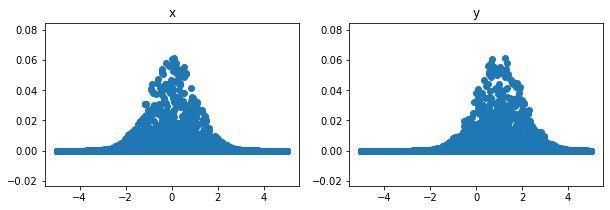

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))
ax1.scatter(X[:,0], g); ax1.set_title("x"); 
ax2.scatter(X[:,1], g); ax2.set_title("y"); 

In [14]:
import string
attributes = list(string.ascii_lowercase)[:n_attributes]
attributes

['a', 'b', 'c']

In [15]:
g_attrs = []

for id_attr in range(X.shape[1]):
    g_attr = multivariate_normal.pdf(X[:,id_attr], mean=mean[id_attr], cov=cov[id_attr])
    g_attr_norm = scaler.fit_transform(g_attr.reshape(-1, 1))[:,0]
    g_attrs.append(g_attr_norm)

g_attrs = np.array(g_attrs)

In [16]:
# do not normalize drom 0 to 1, try less, 0.5?

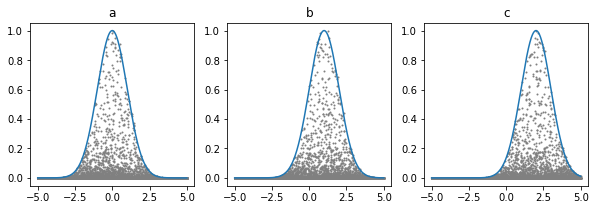

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

fig, axs = plt.subplots(1,X.shape[1], figsize = (10,3))

for id_attr in range(X.shape[1]):
    axs[id_attr].scatter(X[:,id_attr], g_sc, s= 1, c="gray"); 
    axs[id_attr].set_title(attributes[id_attr]); 
    ids = np.argsort(X[:,id_attr])
    axs[id_attr].plot(X[ids,id_attr], g_attrs[id_attr][ids])

In [18]:
classes = np.random.choice([0, 1], size=X.shape[0], p=[.5, .5])
opposed = 1 - classes

In [19]:
values = np.vstack((classes, opposed)).T

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
g_sc = np.round_(scaler.fit_transform(g.reshape(-1, 1))[:,0], 15)
print(min(g_sc), max(g_sc))

0.0 1.0


In [21]:
predicted_classes = [ np.random.choice(values[i:i+1][0], 1,
                          p = [1-g_sc[i], g_sc[i]])[0]
        for i in range(0, g_sc.shape[0]) ]
predicted_classes = np.asarray(predicted_classes)

In [22]:
print(X.shape)

np.hstack((X, np.vstack([classes, predicted_classes]).T))

(10000, 3)


array([[-1.25459881,  4.50714306,  2.31993942,  1.        ,  1.        ],
       [ 0.98658484, -3.4398136 , -3.4400548 ,  0.        ,  0.        ],
       [-4.41916388,  3.66176146,  1.01115012,  1.        ,  1.        ],
       ...,
       [ 2.77070991, -3.4174044 , -3.76695794,  0.        ,  0.        ],
       [-2.30683505,  4.5227545 ,  2.47824211,  0.        ,  0.        ],
       [-4.80544137, -0.98995158, -2.42602021,  0.        ,  0.        ]])

In [23]:
df_analysis = pd.DataFrame(np.hstack((X, classes.reshape(-1,1), predicted_classes.reshape(-1,1))), \
                           columns = attributes + ['true_class', 'predicted_class']).round(5)

In [24]:
df_analysis.head()

,a,b,c,true_class,predicted_class
0,-1.25460,4.50714,2.31994,1.0,1.0
1,0.98658,-3.43981,-3.44005,0.0,0.0
2,-4.41916,3.66176,1.01115,1.0,1.0
3,2.08073,-4.79416,4.69910,0.0,0.0
4,3.32443,-2.87661,-3.18175,1.0,1.0


In [25]:
min_max_vals = {attributes[e] : (min(X[:, 0]),max(X[:, 0])) for e in range(X.shape[1])}

In [26]:
pred_name ="predicted_class"
class_name =  "true_class" 
class_map={"P":1, "N":0}

## Tree divergence

In [27]:
min_support = 0.1
metric = "d_error"
#target = "n"
continuous_attributes = attributes

In [28]:
from tree_discretization import TreeDiscretization

tree_discr = TreeDiscretization()


type_experiment = "one_at_time"

type_criterion = "weighted_sum_abs_reference_s"


generalization_dict, discretizations = tree_discr.get_tree_discretization(
    df_analysis,
    type_splitting=type_experiment,
    min_support=0.1,
    metric=metric,
    continuous_attributes= list(continuous_attributes),
    storeTree=True,
    type_criterion = type_criterion,
    minimal_gain = 0.00,    
    class_map=class_map,
    class_and_pred_names=[class_name, pred_name],

    #target_col = target
)
tree_discr.printDiscretizationTrees(round_v =2)

dot = {}
for attribute in continuous_attributes:
    if attribute in tree_discr.trees:
        dot[attribute] = tree_discr.trees[attribute].visualizeTreeDiGraph(all_info=False)

a
 root s=1.00 --> d_error=0.00
         a<=1.31308 s=0.63 --> d_error=0.01
                 a<=-1.23537 s=0.37 --> d_error=-0.01
                         a<=-2.42196 s=0.25 --> d_error=-0.02
                         a>=-2.42136 s=0.12 --> d_error=-0.00
                 a>=-1.2344 s=0.26 --> d_error=0.04
                         a<=0.19607 s=0.15 --> d_error=0.05
                         a>=0.19612 s=0.11 --> d_error=0.02
         a>=1.31419 s=0.37 --> d_error=-0.01
                 a<=2.40809 s=0.11 --> d_error=-0.01
                 a>=2.40818 s=0.26 --> d_error=-0.02

b
 root s=1.00 --> d_error=0.00
         b<=-0.77995 s=0.42 --> d_error=-0.01
                 b<=-1.77667 s=0.32 --> d_error=-0.02
                 b>=-1.77662 s=0.10 --> d_error=-0.01
         b>=-0.77808 s=0.58 --> d_error=0.01
                 b<=2.46567 s=0.32 --> d_error=0.03
                         b<=0.55312 s=0.14 --> d_error=0.01
                         b>=0.55364 s=0.19 --> d_error=0.04
                 b>

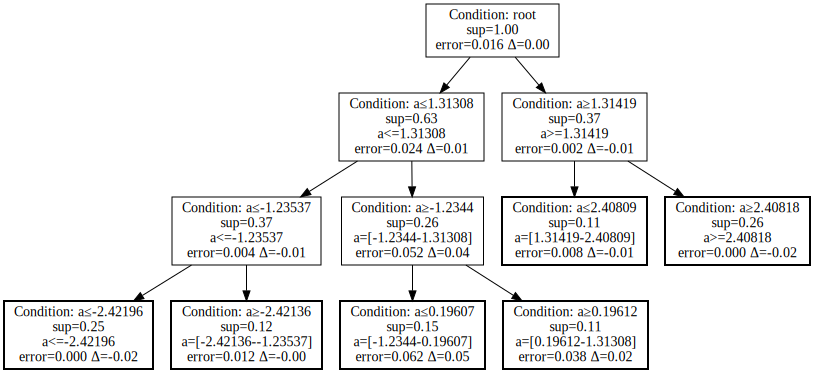

In [29]:
tree_discr.trees[attributes[0]].visualizeTreeDiGraph(all_info=False)

## Plot ranges

In [30]:
attribute = attributes[0]

splits = tree_discr.trees[attribute].get_discretization_relations(apply_generalization=True, generalization_dict = generalization_dict)

In [31]:
plot_points = True

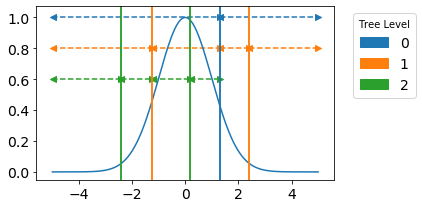

In [32]:
i = 0

attribute = attributes[i]

fig, ax = plt.subplots(figsize = (6,3))
# ax.scatter(X[:,i], g_sc, c="lightgray", s=1)
ax = plot_normal_attr(X[:,i], ax, g_sc, g_attrs[i], plot_points = False)


ax, cmap, levels = add_splits_axes( attribute, ax, tree_discr, min_max_vals, g_sc, eps = 0.01, show_span = False) #, show_lines=False)


import matplotlib.patches as mpatches

plt.legend(handles=[mpatches.Patch(color=cmap(level), label=level) for level in set(levels)], \
          title = "Tree Level", fontsize = 14, bbox_to_anchor=(1.04,1), loc="upper left") 

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
#plt.title(attribute);
plt.tight_layout()
plt.savefig(f"{outfig_dir}/artificial_gaussian_splits_attribute_{attribute}.pdf");

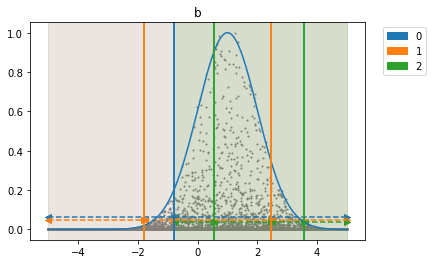

In [33]:
p =0.2
eps = 0.1

i = 1
attribute = attributes[i]

fig, ax = plt.subplots()
ax = plot_normal_attr(X[:,i], ax, g_sc, g_attrs[i], plot_points = plot_points)
ax, cmap, levels = add_splits_axes( attribute, ax, tree_discr, min_max_vals, g, eps = 0.01)


import matplotlib.patches as mpatches

plt.legend(handles=[mpatches.Patch(color=cmap(level), label=level) for level in set(levels)], \
          bbox_to_anchor=(1.04,1), loc="upper left");
plt.title(attribute);

In [34]:
tree_discr.printDiscretizationTrees(round_v=2)

a
 root s=1.00 --> d_error=0.00
         a<=1.31308 s=0.63 --> d_error=0.01
                 a<=-1.23537 s=0.37 --> d_error=-0.01
                         a<=-2.42196 s=0.25 --> d_error=-0.02
                         a>=-2.42136 s=0.12 --> d_error=-0.00
                 a>=-1.2344 s=0.26 --> d_error=0.04
                         a<=0.19607 s=0.15 --> d_error=0.05
                         a>=0.19612 s=0.11 --> d_error=0.02
         a>=1.31419 s=0.37 --> d_error=-0.01
                 a<=2.40809 s=0.11 --> d_error=-0.01
                 a>=2.40818 s=0.26 --> d_error=-0.02

b
 root s=1.00 --> d_error=0.00
         b<=-0.77995 s=0.42 --> d_error=-0.01
                 b<=-1.77667 s=0.32 --> d_error=-0.02
                 b>=-1.77662 s=0.10 --> d_error=-0.01
         b>=-0.77808 s=0.58 --> d_error=0.01
                 b<=2.46567 s=0.32 --> d_error=0.03
                         b<=0.55312 s=0.14 --> d_error=0.01
                         b>=0.55364 s=0.19 --> d_error=0.04
                 b>

## Divergence 0.05

In [35]:
min_sup_divergence=0.05

### Without generalization

In [36]:
from utils_extract_divergence_generalized_ranking import (
    extract_divergence_generalized,
)

FP_fm = extract_divergence_generalized(
    df_analysis,
    discretizations,
    generalization_dict,
    continuous_attributes,
    min_sup_divergence=min_sup_divergence,
    apply_generalization=False,
    true_class_name=pred_name,
    predicted_class_name=class_name,
    class_map=class_map,
    FPM_type="fpgrowth",
    metrics_divergence = [metric],
    type_experiment = type_experiment,
    allow_overalp = False if type_experiment!="all_attributes" else True
)

In [37]:
FP_fm.sort_values(metric, ascending = False).head()

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
7,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486.0,0.061911,0.046111,7.285749
6,0.1663,(c=[1.30186-2.94135]),793,43,51,776,1,1663.0,0.056524,0.040724,7.073731
5,0.1877,(b=[0.55364-2.46567]),879,49,56,893,1,1877.0,0.055940,0.040140,7.412284
13,0.1124,(a=[0.19612-1.31308]),540,22,21,541,1,1124.0,0.038256,0.022456,3.924683
9,0.1359,(b=[-0.77808-0.55312]),636,20,21,682,1,1359.0,0.030169,0.014369,3.085132


In [38]:
from divexplorer_generalized_ranking.FP_Divergence import FP_Divergence
fp_divergence_o=FP_Divergence(FP_fm, metric)
mean_outcome = FP_fm.loc[FP_fm["itemsets"]==frozenset()]["error"][0]
fpdiv = fp_divergence_o.getDivergence(th_redundancy=0).sort_values(fp_divergence_o.metric, ascending = False)

v = mean_outcome*0.1
fpdiv_t = fp_divergence_o.getDivergence(th_redundancy=v).sort_values(fp_divergence_o.metric, ascending = False)

In [39]:
fpdiv.head(20)

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
7,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486.0,0.061911,0.046111,7.285749
6,0.1663,(c=[1.30186-2.94135]),793,43,51,776,1,1663.0,0.056524,0.040724,7.073731
5,0.1877,(b=[0.55364-2.46567]),879,49,56,893,1,1877.0,0.055940,0.040140,7.412284
13,0.1124,(a=[0.19612-1.31308]),540,22,21,541,1,1124.0,0.038256,0.022456,3.924683
9,0.1359,(b=[-0.77808-0.55312]),636,20,21,682,1,1359.0,0.030169,0.014369,3.085132
11,0.1278,(c=[0.03966-1.30093]),603,18,18,639,1,1278.0,0.028169,0.012369,2.684952
20,0.1000,(c=[2.94163-3.97774]),507,10,9,474,1,1000.0,0.019000,0.003200,0.885263
0,1.0000,(),4917,75,83,4925,0,10000.0,0.015800,0.000000,0.000000
12,0.1164,(a=[-2.42136--1.23537]),565,10,4,585,1,1164.0,0.012027,-0.003773,0.859541
14,0.1082,(a=[1.31419-2.40809]),522,4,5,551,1,1082.0,0.008318,-0.007482,2.111064


In [40]:
if min_sup_divergence not in stats_tree:
    stats_tree[min_sup_divergence] = {}
stats_tree[min_sup_divergence]["base"] = fpdiv.iloc[0]

#### Top

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
7,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486.0,0.061911,0.046111,7.285749


Attribute b not in the itemset
Attribute c not in the itemset


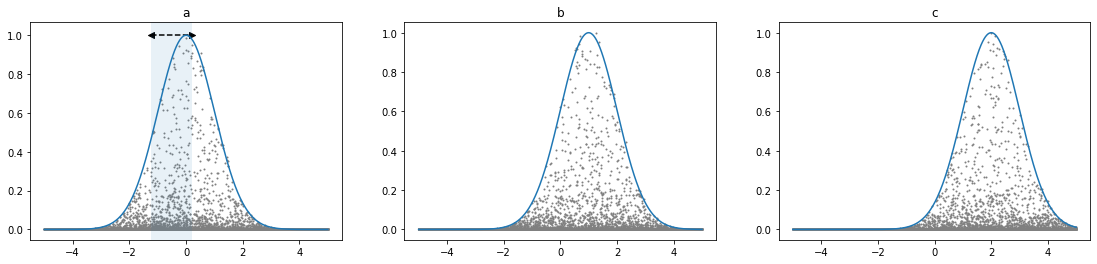

In [41]:
i = 0
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset, g_sc, g_attrs, min_max_vals, plot_points=plot_points);

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
6,0.1663,(c=[1.30186-2.94135]),793,43,51,776,1,1663.0,0.056524,0.040724,7.073731


Attribute a not in the itemset
Attribute b not in the itemset


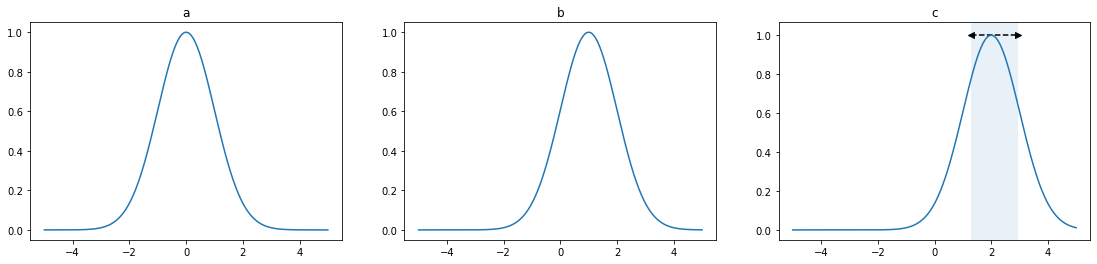

In [42]:
i = 1
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset, g_sc, g_attrs, min_max_vals);

In [43]:
s_cols = []
tvalue_col = "t_value_fp_fn"
cols_show = ["support", "itemsets", metric, tvalue_col]
pd.set_option("max_colwidth", None)
sh = fpdiv.iloc[i:i+3][cols_show]
sh[tvalue_col] = sh[tvalue_col].round(1)
sh["support"] = sh["support"].round(2)
sh[metric] = sh[metric].round(3)
sh

,support,itemsets,d_error,t_value_fp_fn
6,0.17,(c=[1.30186-2.94135]),0.041,7.1
5,0.19,(b=[0.55364-2.46567]),0.040,7.4
13,0.11,(a=[0.19612-1.31308]),0.022,3.9


### With generalization

In [44]:
from utils_extract_divergence_generalized_ranking import (
    extract_divergence_generalized,
)

FP_fm = extract_divergence_generalized(
    df_analysis,
    discretizations,
    generalization_dict,
    continuous_attributes,
    min_sup_divergence=min_sup_divergence,
    apply_generalization=True,
    true_class_name=pred_name,
    predicted_class_name=class_name,
    class_map=class_map,
    #target_name = target,
    FPM_type="fpgrowth",
    metrics_divergence = [metric],
    type_experiment = type_experiment,
    allow_overalp = False if type_experiment!="all_attributes" else True
)

In [45]:
FP_fm.sort_values(metric, ascending = False).head()

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
190,0.0600,"(c=[0.03966-2.94135], a=<=1.31308, b=[-0.77808-2.46567])",211,53,60,276,3,600.0,0.188333,0.172533,10.839073
229,0.0510,"(b=[0.55364-2.46567], a=[-1.2344-1.31308])",216,43,50,201,2,510.0,0.182353,0.166553,9.784586
213,0.0544,"(c=[1.30186-2.94135], b=[-0.77808-2.46567])",208,42,47,247,2,544.0,0.163603,0.147803,9.359312
140,0.0757,"(b=>=-0.77808, a=[-1.2344-1.31308], c=>=0.03966)",313,56,67,321,3,757.0,0.162483,0.146683,10.949447
208,0.0562,"(c=[0.03966-2.94135], b=[0.55364-2.46567])",219,41,47,255,2,562.0,0.156584,0.140784,9.221870


In [46]:
from divexplorer_generalized_ranking.FP_Divergence import FP_Divergence
fp_divergence_o=FP_Divergence(FP_fm, metric)
mean_outcome = FP_fm.loc[FP_fm["itemsets"]==frozenset()]["error"][0]
fpdiv = fp_divergence_o.getDivergence(th_redundancy=0).sort_values(fp_divergence_o.metric, ascending = False)

v = mean_outcome*0.1
fpdiv_t = fp_divergence_o.getDivergence(th_redundancy=v).sort_values(fp_divergence_o.metric, ascending = False)

In [47]:
fp_divergence_o.getDivergence(th_redundancy=0).sort_values("length")

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
0,1.0000,(),4917,75,83,4925,0,10000.0,0.015800,0.000000,0.000000
85,0.1082,(a=[1.31419-2.40809]),522,4,5,551,1,1082.0,0.008318,-0.007482,2.111064
51,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486.0,0.061911,0.046111,7.285749
41,0.1663,(c=[1.30186-2.94135]),793,43,51,776,1,1663.0,0.056524,0.040724,7.073731
32,0.1877,(b=[0.55364-2.46567]),879,49,56,893,1,1877.0,0.055940,0.040140,7.412284
...,...,...,...,...,...,...,...,...,...,...,...
134,0.0783,"(a=<=1.31308, c=>=0.03966, b=>=2.46665)",406,1,2,374,3,783.0,0.003831,-0.011969,3.815543
36,0.1826,"(a=<=1.31308, b=>=-0.77808, c=<=0.03959)",903,2,3,918,3,1826.0,0.002738,-0.013062,6.889363
225,0.0519,"(a=<=1.31308, b=<=-0.77995, c=>=2.94163)",259,1,0,259,3,519.0,0.001927,-0.013873,4.044213
133,0.0788,"(a=<=1.31308, c=<=0.03959, b=>=2.46665)",380,1,0,407,3,788.0,0.001269,-0.014531,6.128234


In [48]:
print("Mean error", fpdiv.loc[0]["error"].round(7))
fpdiv_t

Mean error 0.015799999999999998


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
190,0.0600,"(c=[0.03966-2.94135], a=<=1.31308, b=[-0.77808-2.46567])",211,53,60,276,3,600.0,0.188333,0.172533,10.839073
229,0.0510,"(b=[0.55364-2.46567], a=[-1.2344-1.31308])",216,43,50,201,2,510.0,0.182353,0.166553,9.784586
213,0.0544,"(c=[1.30186-2.94135], b=[-0.77808-2.46567])",208,42,47,247,2,544.0,0.163603,0.147803,9.359312
140,0.0757,"(b=>=-0.77808, a=[-1.2344-1.31308], c=>=0.03966)",313,56,67,321,3,757.0,0.162483,0.146683,10.949447
208,0.0562,"(c=[0.03966-2.94135], b=[0.55364-2.46567])",219,41,47,255,2,562.0,0.156584,0.140784,9.221870
...,...,...,...,...,...,...,...,...,...,...,...
20,0.2540,(a=<=-2.42196),1280,0,0,1260,1,2540.0,0.000000,-0.015800,11.826148
47,0.1555,"(a=>=1.31419, b=<=-0.77995)",777,0,0,778,2,1555.0,0.000000,-0.015800,10.852154
56,0.1453,(b=>=3.57506),724,0,0,729,1,1453.0,0.000000,-0.015800,10.660166
108,0.0956,"(a=>=1.31419, b=>=2.46665)",469,0,0,487,2,956.0,0.000000,-0.015800,9.121920


In [49]:
fpdiv.head(10)

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
190,0.0600,"(c=[0.03966-2.94135], a=<=1.31308, b=[-0.77808-2.46567])",211,53,60,276,3,600.0,0.188333,0.172533,10.839073
229,0.0510,"(b=[0.55364-2.46567], a=[-1.2344-1.31308])",216,43,50,201,2,510.0,0.182353,0.166553,9.784586
213,0.0544,"(c=[1.30186-2.94135], b=[-0.77808-2.46567])",208,42,47,247,2,544.0,0.163603,0.147803,9.359312
140,0.0757,"(b=>=-0.77808, a=[-1.2344-1.31308], c=>=0.03966)",313,56,67,321,3,757.0,0.162483,0.146683,10.949447
208,0.0562,"(c=[0.03966-2.94135], b=[0.55364-2.46567])",219,41,47,255,2,562.0,0.156584,0.140784,9.221870
178,0.0619,"(a=<=1.31308, b=[0.55364-2.46567], c=>=0.03966)",239,46,50,284,3,619.0,0.155089,0.139289,9.602958
143,0.0746,"(c=[0.03966-2.94135], a=[-1.2344-1.31308])",337,49,61,299,2,746.0,0.147453,0.131653,10.153600
118,0.0857,"(b=[-0.77808-2.46567], a=[-1.2344-1.31308])",368,56,68,365,2,857.0,0.144691,0.128891,10.722085
191,0.0599,"(c=[1.30186-2.94135], b=>=-0.77808, a=<=1.31308)",255,39,47,258,3,599.0,0.143573,0.127773,8.951813
101,0.1023,"(a=<=1.31308, c=>=0.03966, b=[-0.77808-2.46567])",418,64,69,472,3,1023.0,0.130010,0.114210,10.835164


In [50]:
if min_sup_divergence not in stats_tree:
    stats_tree[min_sup_divergence] = {}
stats_tree[min_sup_divergence]["generalized"] = fpdiv.iloc[0]

#### Top

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
190,0.06,"(c=[0.03966-2.94135], a=<=1.31308, b=[-0.77808-2.46567])",211,53,60,276,3,600.0,0.188333,0.172533,10.839073


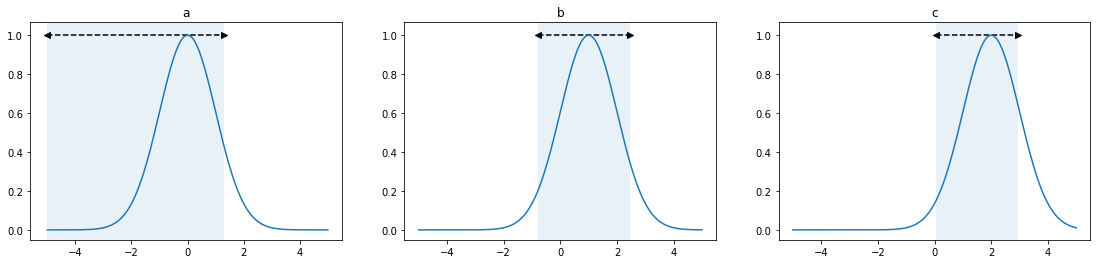

In [51]:
i = 0
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset, g_sc, g_attrs, min_max_vals);

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
229,0.051,"(b=[0.55364-2.46567], a=[-1.2344-1.31308])",216,43,50,201,2,510.0,0.182353,0.166553,9.784586


Attribute c not in the itemset


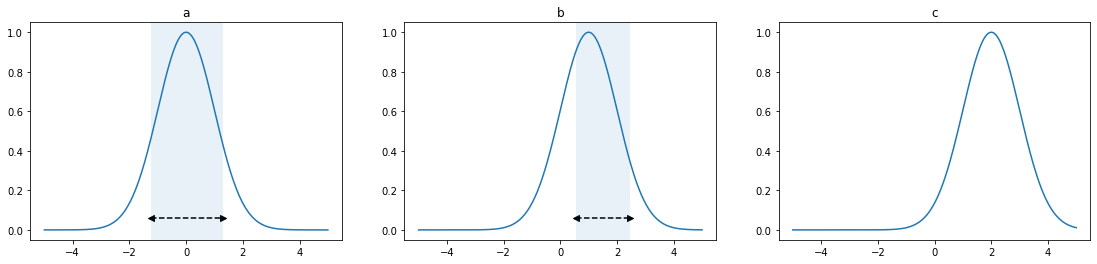

In [52]:
i = 1
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset,  g,g_attrs, min_max_vals);

In [53]:
errors = (df_analysis["true_class"]!=df_analysis["predicted_class"]).values.astype(int)

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
229,0.051,"(b=[0.55364-2.46567], a=[-1.2344-1.31308])",216,43,50,201,2,510.0,0.182353,0.166553,9.784586


Attribute c not in the itemset


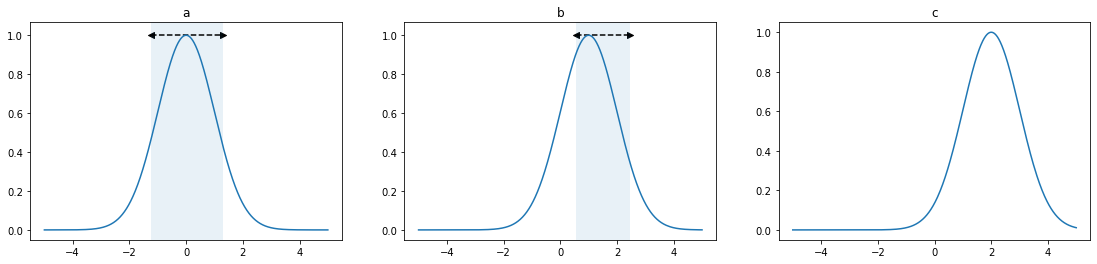

In [54]:
i = 1
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset,  g_sc, g_attrs, min_max_vals);

In [55]:
s_cols = []
tvalue_col = "t_value_fp_fn"
cols_show = ["support", "itemsets", metric, tvalue_col]
pd.set_option("max_colwidth", None)
sh = fpdiv.iloc[i:i+3][cols_show]
sh[tvalue_col] = sh[tvalue_col].round(1)
sh["support"] = sh["support"].round(2)
sh[metric] = sh[metric].round(3)
sh

,support,itemsets,d_error,t_value_fp_fn
229,0.05,"(b=[0.55364-2.46567], a=[-1.2344-1.31308])",0.167,9.8
213,0.05,"(c=[1.30186-2.94135], b=[-0.77808-2.46567])",0.148,9.4
140,0.08,"(b=>=-0.77808, a=[-1.2344-1.31308], c=>=0.03966)",0.147,10.9


## Divergence 0.025

In [56]:
min_sup_divergence=0.025

### Without generalization

In [57]:
from utils_extract_divergence_generalized_ranking import (
    extract_divergence_generalized,
)

FP_fm = extract_divergence_generalized(
    df_analysis,
    discretizations,
    generalization_dict,
    continuous_attributes,
    min_sup_divergence=min_sup_divergence,
    apply_generalization=False,
    true_class_name=pred_name,
    predicted_class_name=class_name,
    class_map=class_map,
    FPM_type="fpgrowth",
    metrics_divergence = [metric],
    type_experiment = type_experiment,
    allow_overalp = False if type_experiment!="all_attributes" else True
)

In [58]:
FP_fm.sort_values(metric, ascending = False).head()

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
49,0.0336,"(c=[1.30186-2.94135], b=[0.55364-2.46567])",128,32,33,143,2,336.0,0.193452,0.177652,8.317201
54,0.0301,"(b=[0.55364-2.46567], a=[-1.2344-0.19607])",128,23,35,115,2,301.0,0.192691,0.176891,7.861830
7,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486.0,0.061911,0.046111,7.285749
6,0.1663,(c=[1.30186-2.94135]),793,43,51,776,1,1663.0,0.056524,0.040724,7.073731
5,0.1877,(b=[0.55364-2.46567]),879,49,56,893,1,1877.0,0.055940,0.040140,7.412284


In [59]:
from divexplorer_generalized_ranking.FP_Divergence import FP_Divergence
fp_divergence_o=FP_Divergence(FP_fm, metric)
mean_outcome = FP_fm.loc[FP_fm["itemsets"]==frozenset()]["error"][0]
fpdiv = fp_divergence_o.getDivergence(th_redundancy=0).sort_values(fp_divergence_o.metric, ascending = False)

v = mean_outcome*0.1
fpdiv_t = fp_divergence_o.getDivergence(th_redundancy=v).sort_values(fp_divergence_o.metric, ascending = False)

In [60]:
fpdiv.head(20)

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
49,0.0336,"(c=[1.30186-2.94135], b=[0.55364-2.46567])",128,32,33,143,2,336.0,0.193452,0.177652,8.317201
54,0.0301,"(b=[0.55364-2.46567], a=[-1.2344-0.19607])",128,23,35,115,2,301.0,0.192691,0.176891,7.861830
7,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486.0,0.061911,0.046111,7.285749
6,0.1663,(c=[1.30186-2.94135]),793,43,51,776,1,1663.0,0.056524,0.040724,7.073731
5,0.1877,(b=[0.55364-2.46567]),879,49,56,893,1,1877.0,0.055940,0.040140,7.412284
13,0.1124,(a=[0.19612-1.31308]),540,22,21,541,1,1124.0,0.038256,0.022456,3.924683
9,0.1359,(b=[-0.77808-0.55312]),636,20,21,682,1,1359.0,0.030169,0.014369,3.085132
11,0.1278,(c=[0.03966-1.30093]),603,18,18,639,1,1278.0,0.028169,0.012369,2.684952
21,0.1000,(c=[2.94163-3.97774]),507,10,9,474,1,1000.0,0.019000,0.003200,0.885263
0,1.0000,(),4917,75,83,4925,0,10000.0,0.015800,0.000000,0.000000


In [61]:
if min_sup_divergence not in stats_tree:
    stats_tree[min_sup_divergence] = {}
stats_tree[min_sup_divergence]["base"] = fpdiv.iloc[0]

#### Top

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
49,0.0336,"(c=[1.30186-2.94135], b=[0.55364-2.46567])",128,32,33,143,2,336.0,0.193452,0.177652,8.317201


Attribute a not in the itemset


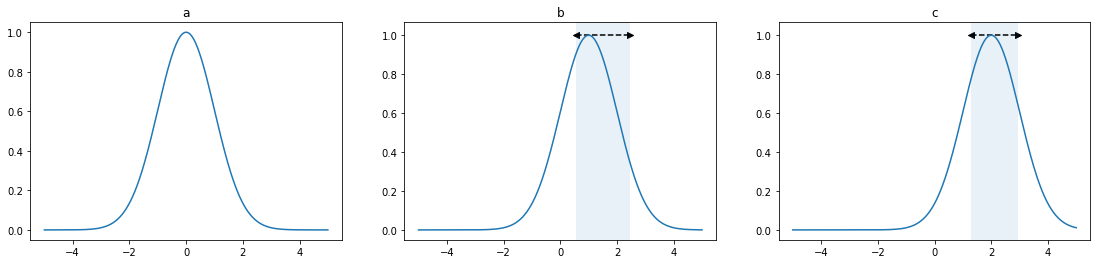

In [62]:
i = 0
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset, g_sc, g_attrs, min_max_vals);

### With generalization

In [63]:
from utils_extract_divergence_generalized_ranking import (
    extract_divergence_generalized,
)

FP_fm = extract_divergence_generalized(
    df_analysis,
    discretizations,
    generalization_dict,
    continuous_attributes,
    min_sup_divergence=min_sup_divergence,
    apply_generalization=True,
    true_class_name=pred_name,
    predicted_class_name=class_name,
    class_map=class_map,
    #target_name = target,
    FPM_type="fpgrowth",
    metrics_divergence = [metric],
    type_experiment = type_experiment,
    allow_overalp = False if type_experiment!="all_attributes" else True
)

In [64]:
FP_fm.sort_values(metric, ascending = False).head()

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
427,0.0264,"(b=[0.55364-2.46567], c=>=0.03966, a=[-1.2344-1.31308])",80,42,48,94,3,264.0,0.340909,0.325109,11.225101
281,0.0424,"(b=[-0.77808-2.46567], c=>=0.03966, a=[-1.2344-1.31308])",148,55,65,156,3,424.0,0.283019,0.267219,12.266815
353,0.0337,"(c=[1.30186-2.94135], a=<=1.31308, b=[-0.77808-2.46567])",102,39,46,150,3,337.0,0.252226,0.236426,10.062714
437,0.0259,"(c=[0.03966-2.94135], b=>=-0.77808, a=[-1.2344-0.19607])",105,25,40,89,3,259.0,0.250965,0.235165,8.815301
273,0.0433,"(c=[0.03966-2.94135], b=>=-0.77808, a=[-1.2344-1.31308])",178,46,57,152,3,433.0,0.237875,0.222075,10.905656


In [65]:
from divexplorer_generalized_ranking.FP_Divergence import FP_Divergence
fp_divergence_o=FP_Divergence(FP_fm, metric)
mean_outcome = FP_fm.loc[FP_fm["itemsets"]==frozenset()]["error"][0]
fpdiv = fp_divergence_o.getDivergence(th_redundancy=0).sort_values(fp_divergence_o.metric, ascending = False)

v = mean_outcome*0.1
fpdiv_t = fp_divergence_o.getDivergence(th_redundancy=v).sort_values(fp_divergence_o.metric, ascending = False)

In [66]:
fp_divergence_o.getDivergence(th_redundancy=0).sort_values("length")

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
0,1.0000,(),4917,75,83,4925,0,10000.0,0.015800,0.000000,0.000000
104,0.1000,(c=[2.94163-3.97774]),507,10,9,474,1,1000.0,0.019000,0.003200,0.885263
82,0.1124,(a=[0.19612-1.31308]),540,22,21,541,1,1124.0,0.038256,0.022456,3.924683
30,0.2001,(c=>=2.94163),982,12,11,996,1,2001.0,0.011494,-0.004306,1.432218
10,0.3236,(b=[-0.77808-2.46567]),1515,69,77,1575,1,3236.0,0.045117,0.029317,7.631582
...,...,...,...,...,...,...,...,...,...,...,...
205,0.0573,"(b=[-0.77808-2.46567], c=>=0.03966, a=>=1.31419)",267,4,5,297,3,573.0,0.015707,-0.000093,0.267418
334,0.0355,"(b=[0.55364-2.46567], c=>=0.03966, a=<=-1.23537)",159,4,2,190,3,355.0,0.016901,0.001101,0.499213
365,0.0328,"(b=[0.55364-2.46567], c=>=0.03966, a=>=1.31419)",160,2,4,162,3,328.0,0.018293,0.002493,0.662915
356,0.0335,"(a=[-1.2344-1.31308], c=<=0.03959, b=>=2.46665)",158,1,0,176,3,335.0,0.002985,-0.012815,2.284377


In [67]:
print("Mean error", fpdiv.loc[0]["error"].round(7))
fpdiv_t

Mean error 0.015799999999999998


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
427,0.0264,"(b=[0.55364-2.46567], c=>=0.03966, a=[-1.2344-1.31308])",80,42,48,94,3,264.0,0.340909,0.325109,11.225101
281,0.0424,"(b=[-0.77808-2.46567], c=>=0.03966, a=[-1.2344-1.31308])",148,55,65,156,3,424.0,0.283019,0.267219,12.266815
353,0.0337,"(c=[1.30186-2.94135], a=<=1.31308, b=[-0.77808-2.46567])",102,39,46,150,3,337.0,0.252226,0.236426,10.062714
437,0.0259,"(c=[0.03966-2.94135], b=>=-0.77808, a=[-1.2344-0.19607])",105,25,40,89,3,259.0,0.250965,0.235165,8.815301
273,0.0433,"(c=[0.03966-2.94135], b=>=-0.77808, a=[-1.2344-1.31308])",178,46,57,152,3,433.0,0.237875,0.222075,10.905656
...,...,...,...,...,...,...,...,...,...,...,...
20,0.2540,(a=<=-2.42196),1280,0,0,1260,1,2540.0,0.000000,-0.015800,11.826148
19,0.2604,(a=>=2.40818),1298,0,0,1306,1,2604.0,0.000000,-0.015800,11.859421
11,0.3212,(b=<=-1.77667),1614,0,0,1598,1,3212.0,0.000000,-0.015800,12.094325
6,0.4058,(c=<=-0.94874),2049,0,0,2009,1,4058.0,0.000000,-0.015800,12.278867


In [68]:
fpdiv.head(10)

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
427,0.0264,"(b=[0.55364-2.46567], c=>=0.03966, a=[-1.2344-1.31308])",80,42,48,94,3,264.0,0.340909,0.325109,11.225101
281,0.0424,"(b=[-0.77808-2.46567], c=>=0.03966, a=[-1.2344-1.31308])",148,55,65,156,3,424.0,0.283019,0.267219,12.266815
353,0.0337,"(c=[1.30186-2.94135], a=<=1.31308, b=[-0.77808-2.46567])",102,39,46,150,3,337.0,0.252226,0.236426,10.062714
437,0.0259,"(c=[0.03966-2.94135], b=>=-0.77808, a=[-1.2344-0.19607])",105,25,40,89,3,259.0,0.250965,0.235165,8.815301
273,0.0433,"(c=[0.03966-2.94135], b=>=-0.77808, a=[-1.2344-1.31308])",178,46,57,152,3,433.0,0.237875,0.222075,10.905656
319,0.0367,"(c=[0.03966-2.94135], b=[0.55364-2.46567], a=<=1.31308)",119,39,44,165,3,367.0,0.226158,0.210358,9.697633
291,0.0416,"(c=[1.30186-2.94135], a=[-1.2344-1.31308])",187,34,47,148,2,416.0,0.194712,0.178912,9.273480
354,0.0336,"(c=[1.30186-2.94135], b=[0.55364-2.46567])",128,32,33,143,2,336.0,0.193452,0.177652,8.317201
391,0.0301,"(b=[0.55364-2.46567], a=[-1.2344-0.19607])",128,23,35,115,2,301.0,0.192691,0.176891,7.861830
190,0.0600,"(c=[0.03966-2.94135], a=<=1.31308, b=[-0.77808-2.46567])",211,53,60,276,3,600.0,0.188333,0.172533,10.839073


In [69]:
if min_sup_divergence not in stats_tree:
    stats_tree[min_sup_divergence] = {}
stats_tree[min_sup_divergence]["generalized"] = fpdiv.iloc[0]

#### Top

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
427,0.0264,"(b=[0.55364-2.46567], c=>=0.03966, a=[-1.2344-1.31308])",80,42,48,94,3,264.0,0.340909,0.325109,11.225101


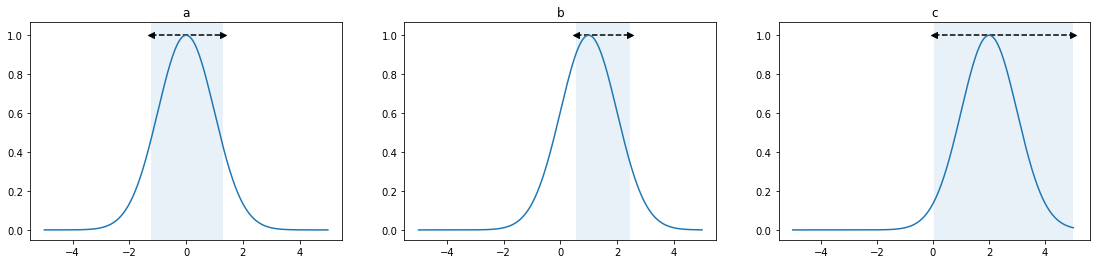

In [70]:
i = 0
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset, g_sc, g_attrs, min_max_vals);

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
281,0.0424,"(b=[-0.77808-2.46567], c=>=0.03966, a=[-1.2344-1.31308])",148,55,65,156,3,424.0,0.283019,0.267219,12.266815


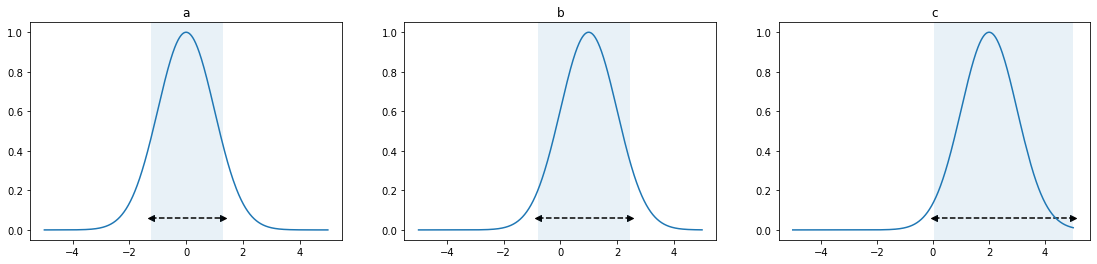

In [71]:
i = 1
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset,  g, g_attrs, min_max_vals);

## Divergence 0.01

In [72]:
min_sup_divergence=0.01

### Without generalization

In [73]:
from utils_extract_divergence_generalized_ranking import (
    extract_divergence_generalized,
)

FP_fm = extract_divergence_generalized(
    df_analysis,
    discretizations,
    generalization_dict,
    continuous_attributes,
    min_sup_divergence=min_sup_divergence,
    apply_generalization=False,
    true_class_name=pred_name,
    predicted_class_name=class_name,
    class_map=class_map,
    FPM_type="fpgrowth",
    metrics_divergence = [metric],
    type_experiment = type_experiment,
    allow_overalp = False if type_experiment!="all_attributes" else True
)

In [74]:
FP_fm.sort_values(metric, ascending = False).head()

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
66,0.0238,"(c=[1.30186-2.94135], a=[-1.2344-0.19607])",109,20,32,77,2,238.0,0.218487,0.202687,7.661349
49,0.0336,"(c=[1.30186-2.94135], b=[0.55364-2.46567])",128,32,33,143,2,336.0,0.193452,0.177652,8.317201
54,0.0301,"(b=[0.55364-2.46567], a=[-1.2344-0.19607])",128,23,35,115,2,301.0,0.192691,0.176891,7.861830
72,0.0209,"(a=[0.19612-1.31308], b=[0.55364-2.46567])",88,20,15,86,2,209.0,0.167464,0.151664,5.981587
86,0.0178,"(c=[1.30186-2.94135], a=[0.19612-1.31308])",78,14,15,71,2,178.0,0.162921,0.147121,5.437232


In [75]:
from divexplorer_generalized_ranking.FP_Divergence import FP_Divergence
fp_divergence_o=FP_Divergence(FP_fm, metric)
mean_outcome = FP_fm.loc[FP_fm["itemsets"]==frozenset()]["error"][0]
fpdiv = fp_divergence_o.getDivergence(th_redundancy=0).sort_values(fp_divergence_o.metric, ascending = False)

v = mean_outcome*0.1
fpdiv_t = fp_divergence_o.getDivergence(th_redundancy=v).sort_values(fp_divergence_o.metric, ascending = False)

In [76]:
fpdiv.head(20)

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
66,0.0238,"(c=[1.30186-2.94135], a=[-1.2344-0.19607])",109,20,32,77,2,238.0,0.218487,0.202687,7.661349
49,0.0336,"(c=[1.30186-2.94135], b=[0.55364-2.46567])",128,32,33,143,2,336.0,0.193452,0.177652,8.317201
54,0.0301,"(b=[0.55364-2.46567], a=[-1.2344-0.19607])",128,23,35,115,2,301.0,0.192691,0.176891,7.861830
72,0.0209,"(a=[0.19612-1.31308], b=[0.55364-2.46567])",88,20,15,86,2,209.0,0.167464,0.151664,5.981587
86,0.0178,"(c=[1.30186-2.94135], a=[0.19612-1.31308])",78,14,15,71,2,178.0,0.162921,0.147121,5.437232
79,0.0195,"(b=[-0.77808-0.55312], a=[-1.2344-0.19607])",83,11,13,88,2,195.0,0.123077,0.107277,4.686060
74,0.0208,"(c=[1.30186-2.94135], b=[-0.77808-0.55312])",80,10,14,104,2,208.0,0.115385,0.099585,4.619501
68,0.0226,"(b=[0.55364-2.46567], c=[0.03966-1.30093])",91,9,14,112,2,226.0,0.101770,0.085970,4.398268
104,0.0143,"(a=[-1.2344-0.19607], c=[2.94163-3.97774])",62,8,6,67,2,143.0,0.097902,0.082102,3.469417
70,0.0212,"(c=[0.03966-1.30093], a=[-1.2344-0.19607])",97,8,11,96,2,212.0,0.089623,0.073823,3.899430


In [77]:
if min_sup_divergence not in stats_tree:
    stats_tree[min_sup_divergence] = {}
stats_tree[min_sup_divergence]["base"] = fpdiv.iloc[0]

#### Top

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
66,0.0238,"(c=[1.30186-2.94135], a=[-1.2344-0.19607])",109,20,32,77,2,238.0,0.218487,0.202687,7.661349


Attribute b not in the itemset


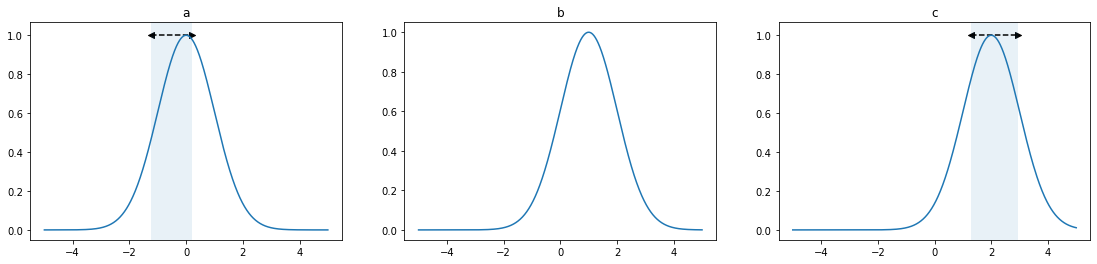

In [78]:
i = 0
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset, g_sc, g_attrs, min_max_vals);

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
49,0.0336,"(c=[1.30186-2.94135], b=[0.55364-2.46567])",128,32,33,143,2,336.0,0.193452,0.177652,8.317201


Attribute a not in the itemset


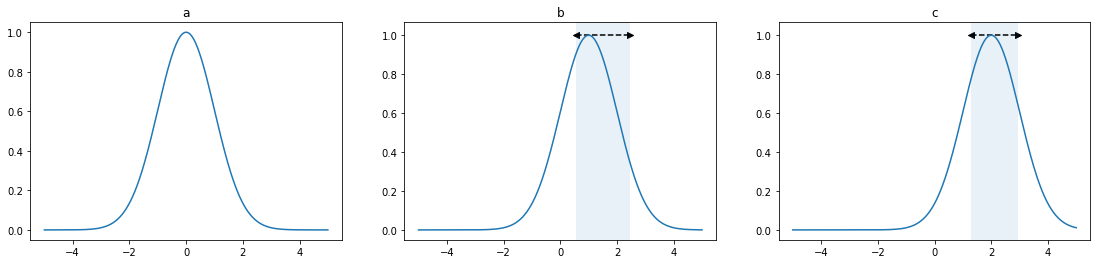

In [79]:
i = 1
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset, g_sc, g_attrs, min_max_vals);

In [80]:
s_cols = []
tvalue_col = "t_value_fp_fn"
cols_show = ["support", "itemsets", metric, tvalue_col]
pd.set_option("max_colwidth", None)
sh = fpdiv.iloc[i:i+3][cols_show]
sh[tvalue_col] = sh[tvalue_col].round(1)
sh["support"] = sh["support"].round(2)
sh[metric] = sh[metric].round(3)
sh

,support,itemsets,d_error,t_value_fp_fn
49,0.03,"(c=[1.30186-2.94135], b=[0.55364-2.46567])",0.178,8.3
54,0.03,"(b=[0.55364-2.46567], a=[-1.2344-0.19607])",0.177,7.9
72,0.02,"(a=[0.19612-1.31308], b=[0.55364-2.46567])",0.152,6.0


### With generalization

In [81]:
from utils_extract_divergence_generalized_ranking import (
    extract_divergence_generalized,
)

FP_fm = extract_divergence_generalized(
    df_analysis,
    discretizations,
    generalization_dict,
    continuous_attributes,
    min_sup_divergence=min_sup_divergence,
    apply_generalization=True,
    true_class_name=pred_name,
    predicted_class_name=class_name,
    class_map=class_map,
    #target_name = target,
    FPM_type="fpgrowth",
    metrics_divergence = [metric],
    type_experiment = type_experiment,
    allow_overalp = False if type_experiment!="all_attributes" else True
)

In [82]:
FP_fm.sort_values(metric, ascending = False).head()

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
701,0.0134,"(c=[1.30186-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])",28,33,43,30,3,134.0,0.567164,0.551364,12.990382
626,0.0156,"(c=[0.03966-2.94135], b=[0.55364-2.46567], a=[-1.2344-1.31308])",33,35,42,46,3,156.0,0.493590,0.477790,12.043980
658,0.0147,"(c=[0.03966-2.94135], b=[-0.77808-2.46567], a=[-1.2344-0.19607])",44,24,39,40,3,147.0,0.428571,0.412771,10.229166
464,0.0241,"(c=[0.03966-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])",69,45,56,71,3,241.0,0.419087,0.403287,12.772574
636,0.0154,"(b=[0.55364-2.46567], c=>=0.03966, a=[-1.2344-0.19607])",49,22,33,50,3,154.0,0.357143,0.341343,8.956557


In [83]:
from divexplorer_generalized_ranking.FP_Divergence import FP_Divergence
fp_divergence_o=FP_Divergence(FP_fm, metric)
mean_outcome = FP_fm.loc[FP_fm["itemsets"]==frozenset()]["error"][0]
fpdiv = fp_divergence_o.getDivergence(th_redundancy=0).sort_values(fp_divergence_o.metric, ascending = False)

v = mean_outcome*0.1
fpdiv_t = fp_divergence_o.getDivergence(th_redundancy=v).sort_values(fp_divergence_o.metric, ascending = False)

In [84]:
fp_divergence_o.getDivergence(th_redundancy=0).sort_values("length")

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
0,1.0000,(),4917,75,83,4925,0,10000.0,0.015800,0.000000,0.000000
4,0.4942,(c=>=0.03966),2378,73,80,2411,1,4942.0,0.030959,0.015159,5.508345
18,0.2610,(a=[-1.2344-1.31308]),1252,61,74,1223,1,2610.0,0.051724,0.035924,7.997969
41,0.1663,(c=[1.30186-2.94135]),793,43,51,776,1,1663.0,0.056524,0.040724,7.073731
1,0.6314,(a=<=1.31308),3097,71,78,3068,1,6314.0,0.023598,0.007798,3.432223
...,...,...,...,...,...,...,...,...,...,...,...
385,0.0308,"(c=>=0.03966, b=<=-0.77995, a=[-1.2344-0.19607])",151,3,3,151,3,308.0,0.019481,0.003681,0.784808
814,0.0102,"(b=[-0.77808-2.46567], c=>=3.97831, a=[-1.2344-1.31308])",45,1,1,55,3,102.0,0.019608,0.003808,0.790469
536,0.0197,"(a=<=1.31308, c=[-0.94675-0.03959], b=[-0.77808-2.46567])",96,1,3,97,3,197.0,0.020305,0.004505,0.828652
365,0.0328,"(b=[0.55364-2.46567], c=>=0.03966, a=>=1.31419)",160,2,4,162,3,328.0,0.018293,0.002493,0.662915


In [85]:
print("Mean error", fpdiv.loc[0]["error"].round(7))
fpdiv_t

Mean error 0.015799999999999998


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
701,0.0134,"(c=[1.30186-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])",28,33,43,30,3,134.0,0.567164,0.551364,12.990382
626,0.0156,"(c=[0.03966-2.94135], b=[0.55364-2.46567], a=[-1.2344-1.31308])",33,35,42,46,3,156.0,0.493590,0.477790,12.043980
658,0.0147,"(c=[0.03966-2.94135], b=[-0.77808-2.46567], a=[-1.2344-0.19607])",44,24,39,40,3,147.0,0.428571,0.412771,10.229166
464,0.0241,"(c=[0.03966-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])",69,45,56,71,3,241.0,0.419087,0.403287,12.772574
636,0.0154,"(b=[0.55364-2.46567], c=>=0.03966, a=[-1.2344-0.19607])",49,22,33,50,3,154.0,0.357143,0.341343,8.956557
...,...,...,...,...,...,...,...,...,...,...,...
287,0.0420,"(b=[2.46665-3.5739], a=>=1.31419)",210,0,0,210,2,420.0,0.000000,-0.015800,5.057906
300,0.0387,"(a=<=-1.23537, c=[-0.94675-0.03959])",199,0,0,188,2,387.0,0.000000,-0.015800,4.671229
312,0.0372,"(b=[2.46665-3.5739], a=<=-1.23537)",182,0,0,190,2,372.0,0.000000,-0.015800,4.489479
315,0.0370,"(c=>=3.97831, a=>=1.31419)",179,0,0,191,2,370.0,0.000000,-0.015800,4.464965


In [86]:
fpdiv.head(10)

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
701,0.0134,"(c=[1.30186-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])",28,33,43,30,3,134.0,0.567164,0.551364,12.990382
626,0.0156,"(c=[0.03966-2.94135], b=[0.55364-2.46567], a=[-1.2344-1.31308])",33,35,42,46,3,156.0,0.493590,0.477790,12.043980
658,0.0147,"(c=[0.03966-2.94135], b=[-0.77808-2.46567], a=[-1.2344-0.19607])",44,24,39,40,3,147.0,0.428571,0.412771,10.229166
464,0.0241,"(c=[0.03966-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])",69,45,56,71,3,241.0,0.419087,0.403287,12.772574
636,0.0154,"(b=[0.55364-2.46567], c=>=0.03966, a=[-1.2344-0.19607])",49,22,33,50,3,154.0,0.357143,0.341343,8.956557
680,0.0140,"(c=[1.30186-2.94135], b=>=-0.77808, a=[-1.2344-0.19607])",54,19,30,37,3,140.0,0.350000,0.334200,8.413619
427,0.0264,"(b=[0.55364-2.46567], c=>=0.03966, a=[-1.2344-1.31308])",80,42,48,94,3,264.0,0.340909,0.325109,11.225101
466,0.0240,"(c=[1.30186-2.94135], b=>=-0.77808, a=[-1.2344-1.31308])",93,33,44,70,3,240.0,0.320833,0.305033,10.211393
452,0.0247,"(b=[-0.77808-2.46567], c=>=0.03966, a=[-1.2344-0.19607])",88,33,46,80,3,247.0,0.319838,0.304038,10.331049
789,0.0110,"(a=[0.19612-1.31308], b=[0.55364-2.46567], c=>=0.03966)",31,20,15,44,3,110.0,0.318182,0.302382,6.951518


In [87]:
if min_sup_divergence not in stats_tree:
    stats_tree[min_sup_divergence] = {}
stats_tree[min_sup_divergence]["generalized"] = fpdiv.iloc[0]

#### Top

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
701,0.0134,"(c=[1.30186-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])",28,33,43,30,3,134.0,0.567164,0.551364,12.990382


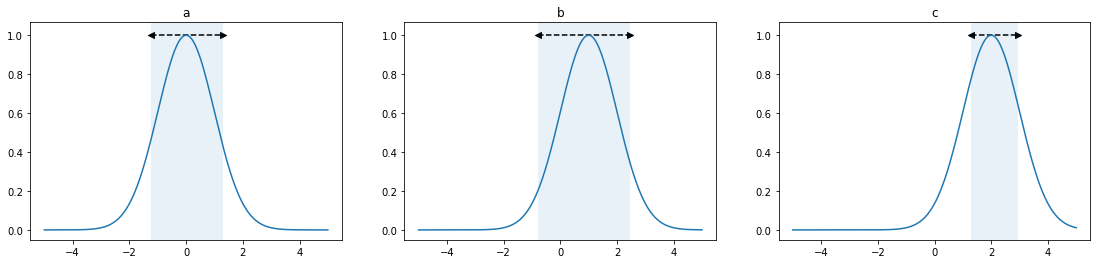

In [88]:
i = 0
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset, g_sc, g_attrs, min_max_vals);

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
626,0.0156,"(c=[0.03966-2.94135], b=[0.55364-2.46567], a=[-1.2344-1.31308])",33,35,42,46,3,156.0,0.49359,0.47779,12.04398


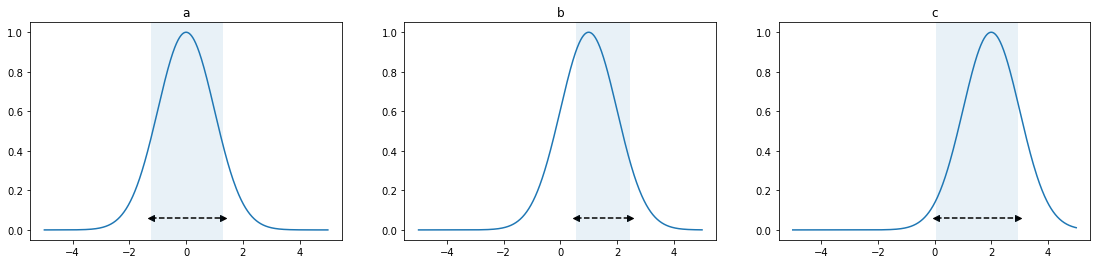

In [89]:
i = 1
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset,  g, g_attrs, min_max_vals);

In [90]:
errors = (df_analysis["true_class"]!=df_analysis["predicted_class"]).values.astype(int)

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
626,0.0156,"(c=[0.03966-2.94135], b=[0.55364-2.46567], a=[-1.2344-1.31308])",33,35,42,46,3,156.0,0.49359,0.47779,12.04398


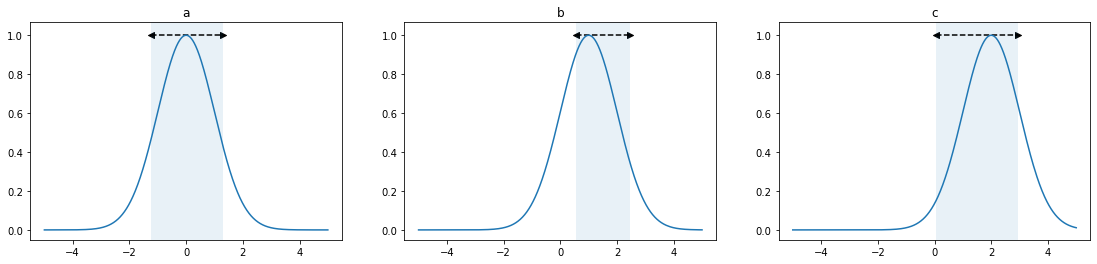

In [91]:
i = 1
display(fpdiv.iloc[i:i+1])

itemset = fpdiv.iloc[i]["itemsets"]
plot_attributes_split(df_analysis, attributes, itemset,  g_sc, g_attrs, min_max_vals);

In [92]:
s_cols = []
tvalue_col = "t_value_fp_fn"
cols_show = ["support", "itemsets", metric, tvalue_col]
pd.set_option("max_colwidth", None)
sh = fpdiv.iloc[i:i+3][cols_show]
sh[tvalue_col] = sh[tvalue_col].round(1)
sh["support"] = sh["support"].round(2)
sh[metric] = sh[metric].round(3)
sh

,support,itemsets,d_error,t_value_fp_fn
626,0.02,"(c=[0.03966-2.94135], b=[0.55364-2.46567], a=[-1.2344-1.31308])",0.478,12.0
658,0.01,"(c=[0.03966-2.94135], b=[-0.77808-2.46567], a=[-1.2344-0.19607])",0.413,10.2
464,0.02,"(c=[0.03966-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])",0.403,12.8


# Tree divergence results

In [161]:
min_sups = [0.005, 0.0075, 0.01, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.075]

In [162]:
stats_tree = {}

In [163]:
from utils_extract_divergence_generalized_ranking import (
    extract_divergence_generalized,
)
for min_sup_divergence in min_sups:
    for apply_generalization in [True, False]:
        if apply_generalization is True:
            gen_type = "generalized"
        else:
            gen_type = "base"
        FP_fm = extract_divergence_generalized(
            df_analysis,
            discretizations,
            generalization_dict,
            continuous_attributes,
            min_sup_divergence=min_sup_divergence,
            apply_generalization=apply_generalization,
            true_class_name=pred_name,
            predicted_class_name=class_name,
            class_map=class_map,
            FPM_type="fpgrowth",
            metrics_divergence = [metric],
            type_experiment = type_experiment,
            allow_overalp = False if type_experiment!="all_attributes" else True
        )
        from divexplorer_generalized_ranking.FP_Divergence import FP_Divergence
        fp_divergence_o=FP_Divergence(FP_fm, metric)
        fpdiv = fp_divergence_o.getDivergence(th_redundancy=0).sort_values(fp_divergence_o.metric, ascending = False)

        if min_sup_divergence not in stats_tree:
            stats_tree[min_sup_divergence] = {}
        stats_tree[min_sup_divergence][gen_type] = fpdiv.iloc[0]

In [164]:
stats_tree.keys()

dict_keys([0.005, 0.0075, 0.01, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.075])

# Discretization

In [165]:
def check_ranges_validity(dfI_discr_quantile, bins, continuous_attributes):
    for cont_attr in continuous_attributes:
        if len(dfI_discr_quantile[cont_attr].value_counts()) != bins:
            print(dict(dfI_discr_quantile[cont_attr].value_counts()))
            raise ValueError


## Quantile

### Varying supports

In [166]:
# DOTO not deterministic

In [167]:
from import_datasets import discretize
stats = {}

for bins in [2,3,4,5, 6, 7, 8, 9, 10]:
    dfI_discr = discretize(
        df_analysis, bins=bins, strategy="quantile", round_v = 3, adaptive=True, attributes = continuous_attributes
    )

    check_ranges_validity(dfI_discr, bins, continuous_attributes)

    # ### Extract divergence

    from divexplorer_generalized.FP_DivergenceExplorer import FP_DivergenceExplorer

    fp_diver = FP_DivergenceExplorer(
        dfI_discr,
        true_class_name = "true_class",
        predicted_class_name= "predicted_class",
    )
    for sup in min_sups:
        FP_fm = fp_diver.getFrequentPatternDivergence(
                        min_support=sup, metrics=[metric]
                    )
        from divexplorer_generalized_ranking.FP_Divergence import FP_Divergence
        fp_divergence_o=FP_Divergence(FP_fm, metric)
        fpdiv = fp_divergence_o.getDivergence(th_redundancy=0).sort_values(fp_divergence_o.metric, ascending = False)
        if sup not in stats:
            stats[sup] = {}
        stats[sup][bins] = fpdiv.iloc[i][metric]

from copy import deepcopy
quantile_stats2 = deepcopy(stats)


0.005  -  6


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
185,0.0051,"(b=(-0.013-1.631], a=(0.029-1.685], c=(1.611-3.283])",17,14,12,8,3,51.0,0.509804,0.494004,7.253551


[('generalized', 0.6641999999999999), ('base', 0.6641999999999999)]
0.0075  -  5


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
135,0.0084,"(c=(0.977-2.942], b=(0.988-3.026], a=(-0.957-1.011])",23,22,14,25,3,84.0,0.428571,0.412771,7.803529


[('generalized', 0.6242), ('base', 0.20268739495798316)]
0.01  -  4


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
113,0.0147,"(c=(-0.014-2.412], b=(-0.013-2.497], a=(0.029-2.509])",48,19,27,53,3,147.0,0.312925,0.297125,7.890438


[('generalized', 0.5513641791044777), ('base', 0.20268739495798316)]
0.02  -  5


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
86,0.0372,"(c=(0.977-2.942], a=(-0.957-1.011])",161,44,30,137,2,372.0,0.198925,0.183125,8.913516


Attribute b not in the itemset
[('generalized', 0.4032871369294605), ('base', 0.20268739495798316)]
0.025  -  5


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
86,0.0372,"(c=(0.977-2.942], a=(-0.957-1.011])",161,44,30,137,2,372.0,0.198925,0.183125,8.913516


Attribute b not in the itemset
[('generalized', 0.3251090909090909), ('base', 0.1776523809523809)]
0.03  -  5


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
86,0.0372,"(c=(0.977-2.942], a=(-0.957-1.011])",161,44,30,137,2,372.0,0.198925,0.183125,8.913516


Attribute b not in the itemset
[('generalized', 0.2672188679245283), ('base', 0.1776523809523809)]
0.04  -  4


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
42,0.0618,"(c=(-0.014-2.412], b=(-0.013-2.497])",236,44,43,295,2,618.0,0.140777,0.124977,8.964361


Attribute a not in the itemset
[('generalized', 0.2672188679245283), ('base', 0.046111170928667566)]
0.05  -  4


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
42,0.0618,"(c=(-0.014-2.412], b=(-0.013-2.497])",236,44,43,295,2,618.0,0.140777,0.124977,8.964361


Attribute a not in the itemset
[('generalized', 0.17253333333333332), ('base', 0.046111170928667566)]
0.06  -  4


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
42,0.0618,"(c=(-0.014-2.412], b=(-0.013-2.497])",236,44,43,295,2,618.0,0.140777,0.124977,8.964361


Attribute a not in the itemset
[('generalized', 0.17253333333333332), ('base', 0.046111170928667566)]
0.07  -  3


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
24,0.111,"(a=(-1.623-1.685], b=(-1.678-1.631])",513,56,51,490,2,1110.0,0.096396,0.080596,9.06145


Attribute c not in the itemset
[('generalized', 0.14668348745046234), ('base', 0.046111170928667566)]
0.075  -  3


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
24,0.111,"(a=(-1.623-1.685], b=(-1.678-1.631])",513,56,51,490,2,1110.0,0.096396,0.080596,9.06145


Attribute c not in the itemset
[('generalized', 0.14668348745046234), ('base', 0.046111170928667566)]


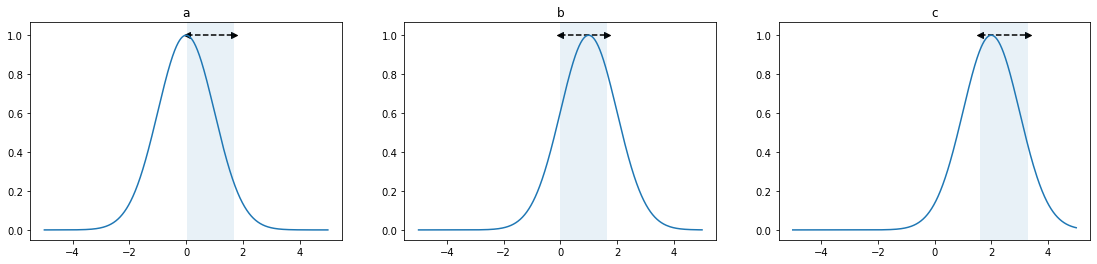

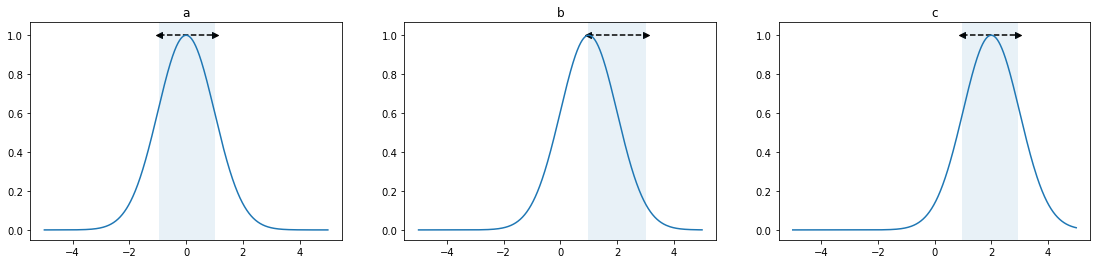

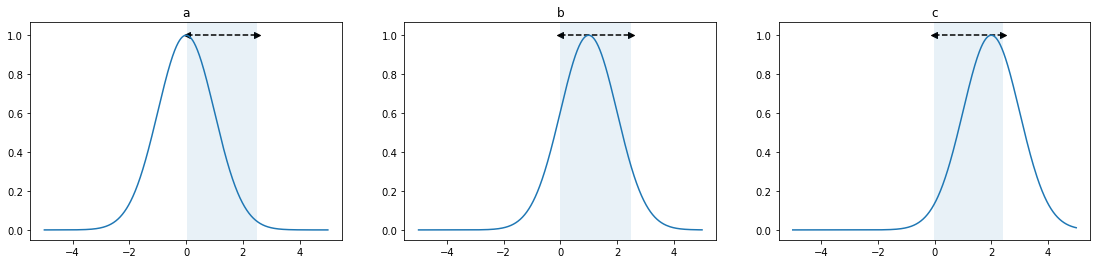

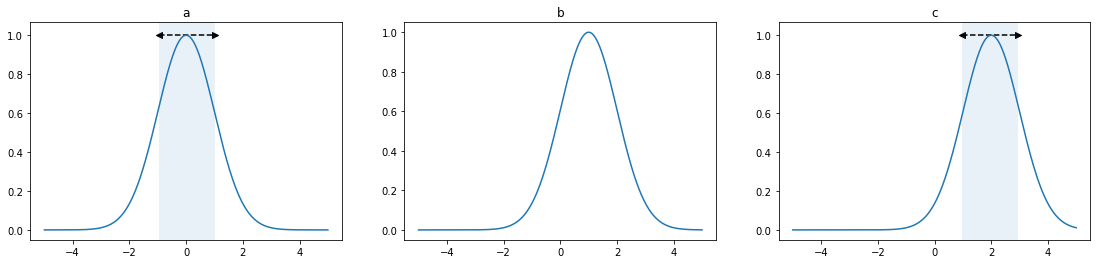

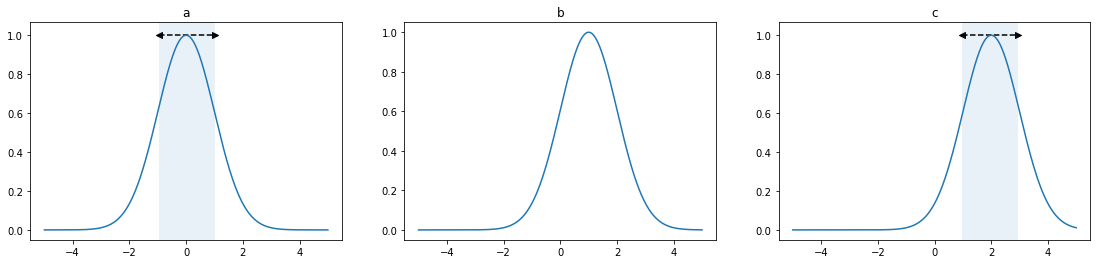

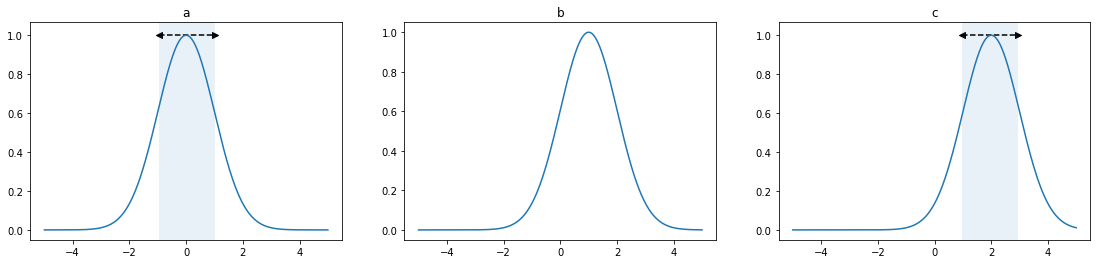

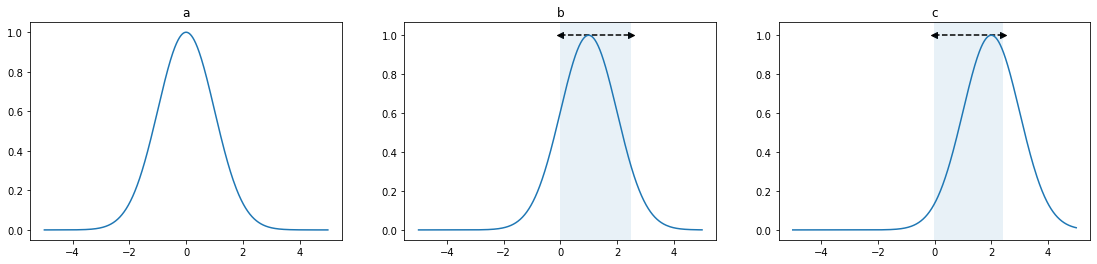

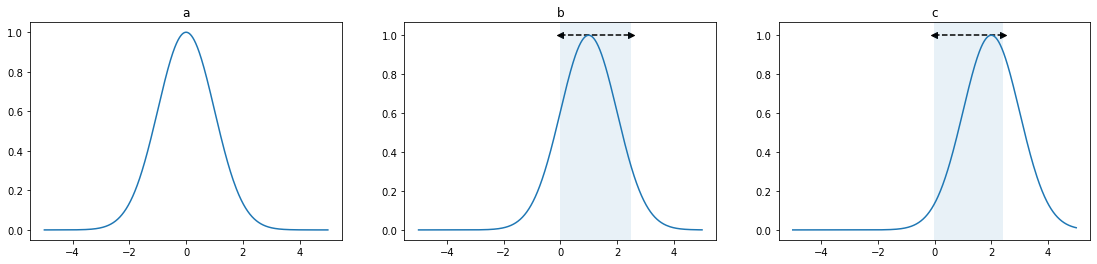

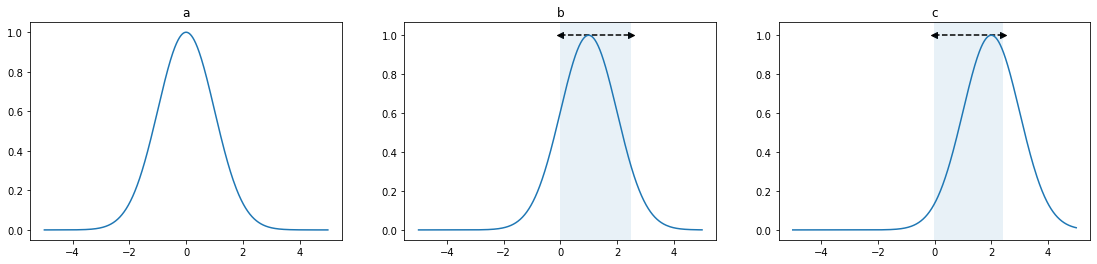

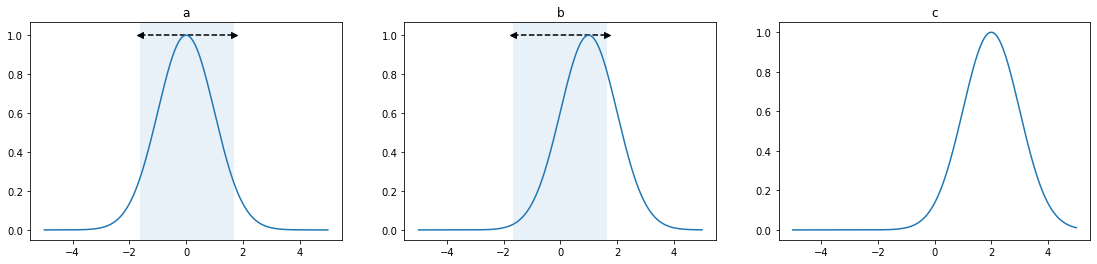

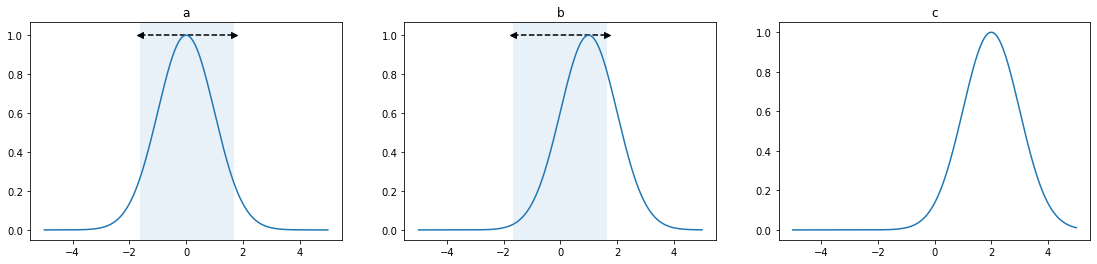

In [168]:
from operator import itemgetter
quantile_stats = {}
for sup in stats:
    best = sorted(stats[sup].items(), key=lambda item: item[1], reverse = True)[0]

    bins = best[0]

    print(sup , " - ", bins)

    from import_datasets import discretize
    dfI_discr = discretize(
        df_analysis, bins=bins, strategy="quantile", round_v = 3, adaptive=True, attributes = continuous_attributes
    )

    from divexplorer_generalized.FP_DivergenceExplorer import FP_DivergenceExplorer

    fp_diver = FP_DivergenceExplorer(
        dfI_discr,
        true_class_name = "true_class",
        predicted_class_name= "predicted_class",
    )

    FP_fm = fp_diver.getFrequentPatternDivergence(
                    min_support=sup, metrics=["d_error"]
                )
    from divexplorer_generalized_ranking.FP_Divergence import FP_Divergence
    fp_divergence_o=FP_Divergence(FP_fm, metric)
    fpdiv = fp_divergence_o.getDivergence(th_redundancy=0).sort_values(fp_divergence_o.metric, ascending = False)

    i = 0

    display(fpdiv.iloc[i:i+1])

    itemset = fpdiv.iloc[i]["itemsets"]
    plot_attributes_split(df_analysis, attributes, itemset, g_sc, g_attrs, min_max_vals);
    quantile_stats[sup] = fpdiv.iloc[i]
    print([(g, v[metric]) for g, v in stats_tree[sup].items()])

In [169]:
dfs = []
for sup in stats_tree:
    for t in stats_tree[sup]:
        df_i = pd.DataFrame(stats_tree[sup][t]).T
        df_i["sup_tree"] = sup
        df_i["type"] = f"tree_{t}"
        dfs.append(df_i)
dfs = pd.concat(dfs)
cols = list(dfs.columns)
dfs

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn,sup_tree,type
1070,0.005,"(c=[1.30186-2.94135], b=[0.55364-2.46567], a=[-1.2344-0.19607])",7,14,20,9,3,50,0.68,0.6642,10.1973,0.0050,tree_generalized
190,0.005,"(c=[1.30186-2.94135], b=[0.55364-2.46567], a=[-1.2344-0.19607])",7,14,20,9,3,50,0.68,0.6642,10.1973,0.0050,tree_base
931,0.0075,"(c=[1.30186-2.94135], b=[-0.77808-2.46567], a=[-1.2344-0.19607])",13,19,29,14,3,75,0.64,0.6242,11.3885,0.0075,tree_generalized
66,0.0238,"(c=[1.30186-2.94135], a=[-1.2344-0.19607])",109,20,32,77,2,238,0.218487,0.202687,7.66135,0.0075,tree_base
701,0.0134,"(c=[1.30186-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])",28,33,43,30,3,134,0.567164,0.551364,12.9904,0.0100,tree_generalized
66,0.0238,"(c=[1.30186-2.94135], a=[-1.2344-0.19607])",109,20,32,77,2,238,0.218487,0.202687,7.66135,0.0100,tree_base
464,0.0241,"(c=[0.03966-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])",69,45,56,71,3,241,0.419087,0.403287,12.7726,0.0200,tree_generalized
66,0.0238,"(c=[1.30186-2.94135], a=[-1.2344-0.19607])",109,20,32,77,2,238,0.218487,0.202687,7.66135,0.0200,tree_base
427,0.0264,"(b=[0.55364-2.46567], c=>=0.03966, a=[-1.2344-1.31308])",80,42,48,94,3,264,0.340909,0.325109,11.2251,0.0250,tree_generalized
49,0.0336,"(c=[1.30186-2.94135], b=[0.55364-2.46567])",128,32,33,143,2,336,0.193452,0.177652,8.3172,0.0250,tree_base


In [170]:
q_dfs = []
for sup in quantile_stats:
    df_i = pd.DataFrame(quantile_stats[sup]).T
    df_i["sup_tree"] = sup
    q_dfs.append(df_i)
q_dfs = pd.concat(q_dfs)
cols = list(q_dfs.columns)
q_dfs["type"] = "quantile"

In [171]:
df_all = pd.concat([dfs, q_dfs])
df_all = df_all.sort_values(["sup_tree", "type"], ascending = False)
df_all

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn,sup_tree,type
140,0.0757,"(b=>=-0.77808, a=[-1.2344-1.31308], c=>=0.03966)",313,56,67,321,3,757,0.162483,0.146683,10.9494,0.0750,tree_generalized
7,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486,0.0619112,0.0461112,7.28575,0.0750,tree_base
24,0.111,"(a=(-1.623-1.685], b=(-1.678-1.631])",513,56,51,490,2,1110,0.0963964,0.0805964,9.06145,0.0750,quantile
140,0.0757,"(b=>=-0.77808, a=[-1.2344-1.31308], c=>=0.03966)",313,56,67,321,3,757,0.162483,0.146683,10.9494,0.0700,tree_generalized
7,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486,0.0619112,0.0461112,7.28575,0.0700,tree_base
24,0.111,"(a=(-1.623-1.685], b=(-1.678-1.631])",513,56,51,490,2,1110,0.0963964,0.0805964,9.06145,0.0700,quantile
190,0.06,"(c=[0.03966-2.94135], a=<=1.31308, b=[-0.77808-2.46567])",211,53,60,276,3,600,0.188333,0.172533,10.8391,0.0600,tree_generalized
7,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486,0.0619112,0.0461112,7.28575,0.0600,tree_base
42,0.0618,"(c=(-0.014-2.412], b=(-0.013-2.497])",236,44,43,295,2,618,0.140777,0.124977,8.96436,0.0600,quantile
190,0.06,"(c=[0.03966-2.94135], a=<=1.31308, b=[-0.77808-2.46567])",211,53,60,276,3,600,0.188333,0.172533,10.8391,0.0500,tree_generalized


### Comparison

In [172]:
df_all[['sup_tree', 'type', 'support', 'itemsets', 'd_error', 't_value_fp_fn' ]]
df_all_t = df_all.set_index(['sup_tree', 'type'])
df_all_t[['support', 'itemsets', 'd_error', 't_value_fp_fn']]

support  \
sup_tree type                       
0.0750   tree_generalized  0.0757   
         tree_base         0.1486   
         quantile           0.111   
0.0700   tree_generalized  0.0757   
         tree_base         0.1486   
         quantile           0.111   
0.0600   tree_generalized    0.06   
         tree_base         0.1486   
         quantile          0.0618   
0.0500   tree_generalized    0.06   
         tree_base         0.1486   
         quantile          0.0618   
0.0400   tree_generalized  0.0424   
         tree_base         0.1486   
         quantile          0.0618   
0.0300   tree_generalized  0.0424   
         tree_base         0.0336   
         quantile          0.0372   
0.0250   tree_generalized  0.0264   
         tree_base         0.0336   
         quantile          0.0372   
0.0200   tree_generalized  0.0241   
         tree_base         0.0238   
         quantile          0.0372   
0.0100   tree_generalized  0.0134   
         tree_base         0.0238   
         quantile          0.0147   
0.0075   tree_generalized  0.0075   
         tree_base         0.0238   
         quantile          0.0084   
0.0050   tree_generalized   0.005   
         tree_base          0.005   
         quantile          0.0051   

                                                                                   itemsets  \
sup_tree type                                                                                 
0.0750   tree_generalized                  (b=>=-0.77808, a=[-1.2344-1.31308], c=>=0.03966)   
         tree_base                                                    (a=[-1.2344-0.19607])   
         quantile                                      (a=(-1.623-1.685], b=(-1.678-1.631])   
0.0700   tree_generalized                  (b=>=-0.77808, a=[-1.2344-1.31308], c=>=0.03966)   
         tree_base                                                    (a=[-1.2344-0.19607])   
         quantile                                      (a=(-1.623-1.685], b=(-1.678-1.631])   
0.0600   tree_generalized          (c=[0.03966-2.94135], a=<=1.31308, b=[-0.77808-2.46567])   
         tree_base                                                    (a=[-1.2344-0.19607])   
         quantile                                      (c=(-0.014-2.412], b=(-0.013-2.497])   
0.0500   tree_generalized          (c=[0.03966-2.94135], a=<=1.31308, b=[-0.77808-2.46567])   
         tree_base                                                    (a=[-1.2344-0.19607])   
         quantile                                      (c=(-0.014-2.412], b=(-0.013-2.497])   
0.0400   tree_generalized          (b=[-0.77808-2.46567], c=>=0.03966, a=[-1.2344-1.31308])   
         tree_base                                                    (a=[-1.2344-0.19607])   
         quantile                                      (c=(-0.014-2.412], b=(-0.013-2.497])   
0.0300   tree_generalized          (b=[-0.77808-2.46567], c=>=0.03966, a=[-1.2344-1.31308])   
         tree_base                               (c=[1.30186-2.94135], b=[0.55364-2.46567])   
         quantile                                       (c=(0.977-2.942], a=(-0.957-1.011])   
0.0250   tree_generalized           (b=[0.55364-2.46567], c=>=0.03966, a=[-1.2344-1.31308])   
         tree_base                               (c=[1.30186-2.94135], b=[0.55364-2.46567])   
         quantile                                       (c=(0.977-2.942], a=(-0.957-1.011])   
0.0200   tree_generalized  (c=[0.03966-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])   
         tree_base                               (c=[1.30186-2.94135], a=[-1.2344-0.19607])   
         quantile                                       (c=(0.977-2.942], a=(-0.957-1.011])   
0.0100   tree_generalized  (c=[1.30186-2.94135], a=[-1.2344-1.31308], b=[-0.77808-2.46567])   
         tree_base                               (c=[1.30186-2.94135], a=[-1.2344-0.19607])   
         quantile                     (c=(-0.014-2.412], b=(-0.013-2.4

In [173]:
df_all[['sup_tree', 'type', 'support', 'itemsets', 'd_error', 't_value_fp_fn' ]]
df_all_t = df_all.set_index(['type', 'sup_tree'])
df_all_t

,,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
type,sup_tree,,,,,,,,,,,
tree_generalized,0.0750,0.0757,"(b=>=-0.77808, a=[-1.2344-1.31308], c=>=0.03966)",313,56,67,321,3,757,0.162483,0.146683,10.9494
tree_base,0.0750,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486,0.0619112,0.0461112,7.28575
quantile,0.0750,0.111,"(a=(-1.623-1.685], b=(-1.678-1.631])",513,56,51,490,2,1110,0.0963964,0.0805964,9.06145
tree_generalized,0.0700,0.0757,"(b=>=-0.77808, a=[-1.2344-1.31308], c=>=0.03966)",313,56,67,321,3,757,0.162483,0.146683,10.9494
tree_base,0.0700,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486,0.0619112,0.0461112,7.28575
quantile,0.0700,0.111,"(a=(-1.623-1.685], b=(-1.678-1.631])",513,56,51,490,2,1110,0.0963964,0.0805964,9.06145
tree_generalized,0.0600,0.06,"(c=[0.03966-2.94135], a=<=1.31308, b=[-0.77808-2.46567])",211,53,60,276,3,600,0.188333,0.172533,10.8391
tree_base,0.0600,0.1486,(a=[-1.2344-0.19607]),712,39,53,682,1,1486,0.0619112,0.0461112,7.28575
quantile,0.0600,0.0618,"(c=(-0.014-2.412], b=(-0.013-2.497])",236,44,43,295,2,618,0.140777,0.124977,8.96436


## Plot results

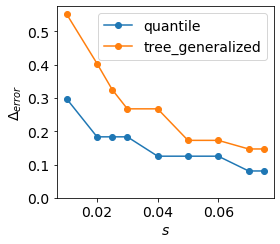

In [209]:
results = {}
results["quantile"] = q_dfs.groupby("sup_tree")["d_error"].apply(float).to_dict()#.to_dict()
results["tree_generalized"] = dfs.loc[dfs["type"]=="tree_generalized"].groupby("sup_tree")["d_error"].apply(float).to_dict()#.to_dict()
#results["tree_base"] = dfs.loc[dfs["type"]=="tree_base"].groupby("sup_tree")["d_error"].apply(float).to_dict()#.to_dict()

sup_show = [0.01, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.075]

fig, ax = plt.subplots(figsize= (4,3.5))
for k, r in results.items():
    r_plot = {k:v for k,v in r.items() if k in sup_show}
    
    ax.plot(list(r_plot.keys()), list(r_plot.values()), label = k, marker = "o")
ax.set_xlabel("$s$")
ax.set_ylabel("$\Delta_{error}$")
ax.set_ylim((0))
plt.legend(fontsize = 14);
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
     ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
    
plt.tight_layout()
plt.savefig(f"{outfig_dir}/artificial_gaussian_discretization_comparison.pdf");

# Plots

In [211]:
def show_splits_axes_2(attr, ax, ranges, min_max_vals, h = 2, eps=0, color = "black", linestyle = '--', label = None):
    if attr not in ranges:
        print(f"Attribute {attr} not in the itemset")
        return ax
    start_v, end_v = ranges[attr]
    if start_v is None:
        start_v = min_max_vals[attr][0]
    if end_v is None:
        end_v = min_max_vals[attr][1]
    
    ax.vlines(x = start_v, ymin=0, ymax=1, linestyle = linestyle, colors=color)
    ax.vlines(x = end_v, ymin=0, ymax=1, linestyle = linestyle, colors=color)
#    end_v, alpha=0.1)
    ax.hlines(y=h, xmin=start_v, xmax=end_v, linestyle = linestyle, colors=color, label=label)
    ax.scatter([start_v + eps ], [h], marker = '<',  c=color)
    ax.scatter([end_v - eps], [h], marker = '>' ,  c=color)
    return ax
        

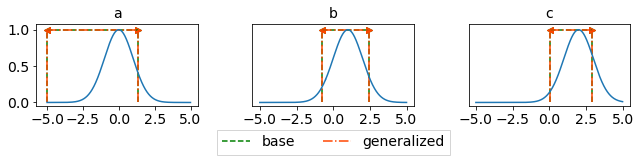

In [221]:
sup = 0.025

target_vals = g_sc
ranges_1 = get_ranges_from_itemset(stats_tree[0.05]["generalized"].itemsets)
ranges_2 = get_ranges_from_itemset(stats_tree[0.05]["generalized"].itemsets)
eps = 0
h = max(target_vals)+eps
fig, axs = plt.subplots(1,len(attributes), figsize = (9,2.5))
for e, attribute in enumerate(attributes):
    axs[e] = plot_normal_attr(df_analysis[attribute].values, axs[e], target_vals, g_attrs[e], plot_points = False)
    l1 = "base" 
    l2 = "generalized" 
    show_splits_axes_2(attribute, axs[e], ranges_1, min_max_vals, h, eps = eps, color = "green", label=l1)
    show_splits_axes_2(attribute, axs[e], ranges_2, min_max_vals, h, eps = eps, color = "orangered", linestyle = "-.", label=l2)
    axs[e].set_title(attribute, fontsize = 14);
    if e>0:
        axs[e].set_yticks([])
    for item in ([axs[e].title, axs[e].xaxis.label, axs[e].yaxis.label] +
             axs[e].get_xticklabels() + axs[e].get_yticklabels()):
        item.set_fontsize(14)
plt.subplots_adjust(wspace = .025)
labels = {}
for ax in axs:
    h, l = ax.get_legend_handles_labels()
    for id_l in range(0, len(l)):
        if l[id_l] not in labels:
            labels[l[id_l]] = h[id_l]
#axs[0].legend(labels.values(), labels.keys(), loc='upper center', bbox_to_anchor=(1, 1.05))
axs[1].legend(labels.values(), labels.keys(),loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3, fontsize = 14)
#plt.title(attribute);
plt.tight_layout()
#fig.suptitle(f'$s$={sup}', fontsize=16)
plt.savefig(f"{outfig_dir}/artificial_gaussian_splits_sup_{sup}.pdf");

Attribute b not in the itemset
Attribute c not in the itemset
Sup:0.05. base 0.046
Sup:0.05. generalized 0.173
Attribute a not in the itemset
Sup:0.025. base 0.178
Sup:0.025. generalized 0.325


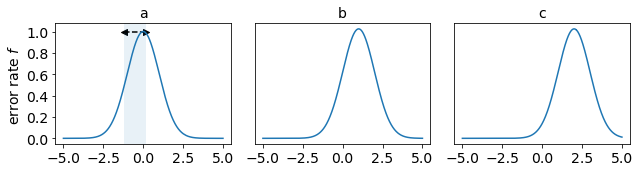

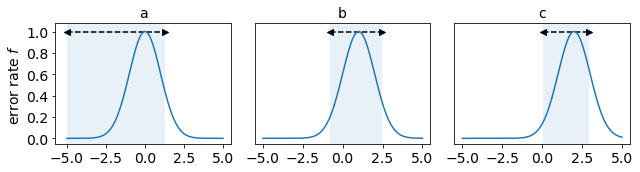

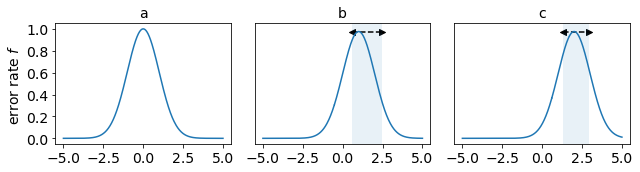

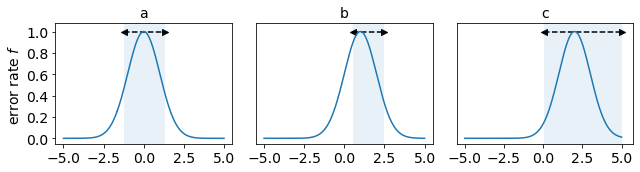

In [244]:
for sup in [0.05, 0.025]:
    for type_gen in ["base", "generalized"]:
        target_vals = g_sc
        ranges_1 = get_ranges_from_itemset(stats_tree[sup][type_gen].itemsets)
        eps = 0
        h = max(target_vals)+eps
        fig, axs = plt.subplots(1,len(attributes), figsize = (9,2.5))
        for e, attribute in enumerate(attributes):
            axs[e] = plot_normal_attr(df_analysis[attribute].values, axs[e], target_vals, g_attrs[e], plot_points = False)
            l1 = "base" 
            l2 = "generalized" 
            show_splits_axes(attribute, axs[e], ranges_1, min_max_vals, h, eps = eps)
            axs[e].set_title(attribute, fontsize = 14);
            if e>0:
                axs[e].set_yticks([])
            for item in ([axs[e].title, axs[e].xaxis.label, axs[e].yaxis.label] +
                     axs[e].get_xticklabels() + axs[e].get_yticklabels()):
                item.set_fontsize(14)
        plt.subplots_adjust(wspace = .025)
        labels = {}
        for ax in axs:
            h, l = ax.get_legend_handles_labels()
            for id_l in range(0, len(l)):
                if l[id_l] not in labels:
                    labels[l[id_l]] = h[id_l]

        axs[0].set_ylabel("error rate $f$")
        #axs[0].legend(labels.values(), labels.keys(), loc='upper center', bbox_to_anchor=(1, 1.05))
        #axs[1].legend(labels.values(), labels.keys(),loc='upper center', 
        #             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3, fontsize = 14)
        #plt.title(attribute);
        plt.tight_layout()
        #fig.suptitle(f'$s$={sup}', fontsize=16)
        plt.savefig(f"{outfig_dir}/artificial_gaussian_splits_sup_{sup}_{type_gen}.pdf");
        print(f"Sup:{sup}. {type_gen} {stats_tree[sup][type_gen][metric]:.3f}")

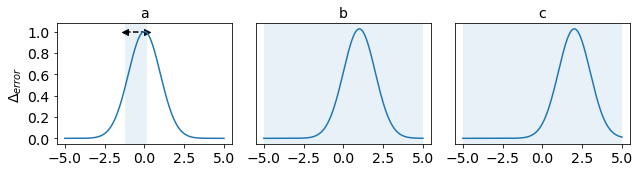

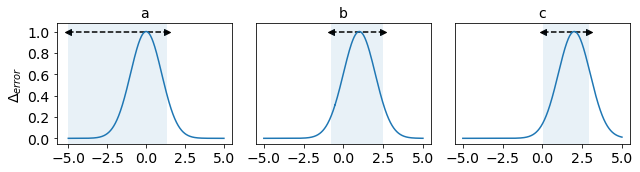

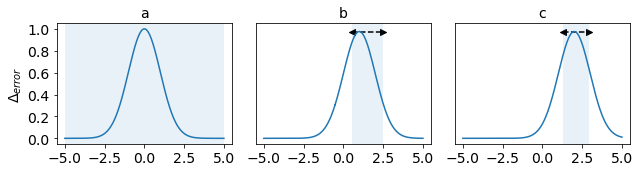

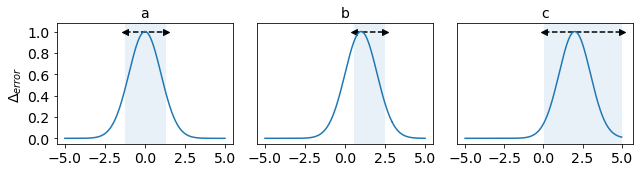

In [237]:
for sup in [0.05, 0.025]:
    for type_gen in ["base", "generalized"]:
        target_vals = g_sc
        ranges_1 = get_ranges_from_itemset(stats_tree[sup][type_gen].itemsets)
        eps = 0
        h = max(target_vals)+eps
        fig, axs = plt.subplots(1,len(attributes), figsize = (9,2.5))
        for e, attribute in enumerate(attributes):
            axs[e] = plot_normal_attr(df_analysis[attribute].values, axs[e], target_vals, g_attrs[e], plot_points = False)
            l1 = "base" 
            l2 = "generalized" 
            show_splits_axes(attribute, axs[e], ranges_1, min_max_vals, h, eps = eps, show_all_if_non = True)
            axs[e].set_title(attribute, fontsize = 14);
            if e>0:
                axs[e].set_yticks([])
            for item in ([axs[e].title, axs[e].xaxis.label, axs[e].yaxis.label] +
                     axs[e].get_xticklabels() + axs[e].get_yticklabels()):
                item.set_fontsize(14)
        plt.subplots_adjust(wspace = .025)
        labels = {}
        for ax in axs:
            h, l = ax.get_legend_handles_labels()
            for id_l in range(0, len(l)):
                if l[id_l] not in labels:
                    labels[l[id_l]] = h[id_l]

        axs[0].set_ylabel("$\Delta_{error}$")
        #axs[0].legend(labels.values(), labels.keys(), loc='upper center', bbox_to_anchor=(1, 1.05))
        #axs[1].legend(labels.values(), labels.keys(),loc='upper center', 
        #             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3, fontsize = 14)
        #plt.title(attribute);
        plt.tight_layout()
        #fig.suptitle(f'$s$={sup}', fontsize=16)
        plt.savefig(f"{outfig_dir}/artificial_gaussian_splits_sup_{sup}_{type_gen}_v2.pdf");

In [ ]:
def plot_attributes_split(df_vals, attributes, itemset, target_vals, g_attrs, min_max_vals, verbose = False, plot_points = False):
    
    ranges = get_ranges_from_itemset(itemset)
    if verbose:
        print("Ranges", ranges)
    eps = 0
    h = max(target_vals)+eps
    
    max_viz = 5
    if len(attributes)> max_viz:
        # Show at most max_viz attributes
        attributes = attributes[:max_viz]
    
    fig, axs = plt.subplots(1,len(attributes), figsize = (19,4))
    for e, attribute in enumerate(attributes):
        axs[e] = plot_normal_attr(df_vals[attribute].values, axs[e], target_vals, g_attrs[e], plot_points = plot_points)
        show_splits_axes(attribute, axs[e], ranges, min_max_vals, h, eps = eps)
        axs[e].set_title(attribute);
    return fig

In [ ]:
aaaaa